In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer

In [85]:
seed = 666
np.random.seed(seed)

In [86]:
df_1 = pd.read_csv('df_1.csv')
df_2 = pd.read_csv('df_2.csv')
df_3 = pd.read_csv('df_3.csv')

In [87]:
df_1_c = df_1.copy()
df_2_c = df_2.copy()
df_3_c = df_3.copy()

In [88]:
df = pd.concat([df_1_c, df_2_c, df_3_c], axis = 0)
df = df.reset_index(drop = True)

In [89]:
pd.set_option('display.max_columns', None)

In [90]:
df

,timestamp,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump
0,2019-12-24 20:21:38.990000010,-27.717755,-51.098985,3.236828,0,0,1,1,11.802369,3.236828,2.457934,1.793759,0.717635,-0.731628,0.106342,11.219029,11.243363,-0.719706,2.052307,-5.734762,6.133305,11.640243,11.500847,11.034913,11.178157,1,0,0,0
1,2019-12-24 20:21:39.000000000,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.693321,-0.030127,11.040661,11.062450,-0.498454,1.902262,-3.115336,3.684071,11.655013,11.715343,11.057294,11.239022,1,0,0,0
2,2019-12-24 20:21:39.009999990,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.829192,0.115919,11.173141,11.204466,-0.139872,1.258850,-2.545675,2.843365,11.604243,11.809643,11.396549,11.211858,1,0,0,0
3,2019-12-24 20:21:39.019999981,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.963666,0.234233,11.747150,11.788938,-0.310262,0.890096,-0.600179,1.117474,11.444361,11.484994,11.546067,11.694704,1,0,0,0
4,2019-12-24 20:21:39.029999971,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.666985,-0.276929,11.051834,11.075405,-1.070658,-0.384013,0.910441,1.456941,11.456193,11.666853,11.355733,11.365829,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344198,2019-12-24 21:53:23.950000048,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-0.912989,-1.304042,10.935516,11.050773,0.859578,2.380371,-0.091553,2.532474,11.142183,11.236468,11.084578,11.219388,1,0,0,0
344199,2019-12-24 21:53:23.960000038,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.274114,-1.855506,11.222022,11.445525,-0.605265,-1.022339,-0.523885,1.298452,11.493950,11.254312,11.759345,12.291465,1,0,0,0
344200,2019-12-24 21:53:23.970000029,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.363099,-1.665965,11.078370,11.285556,-0.986735,-2.176921,-0.597636,2.463696,11.023920,11.491217,11.567065,11.503020,1,0,0,0
344201,2019-12-24 21:53:23.980000019,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.038285,-1.295263,11.232597,11.354601,0.287374,-0.864665,-0.559489,1.069232,11.422023,11.542409,11.175456,10.719307,1,0,0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344203 entries, 0 to 344202
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   timestamp              344203 non-null  object 
 1   latitude               344203 non-null  float64
 2   longitude              344203 non-null  float64
 3   speed                  344203 non-null  float64
 4   unpaved_road           344203 non-null  int64  
 5   cobblestone_road       344203 non-null  int64  
 6   asphalt_road           344203 non-null  int64  
 7   no_speed_bump          344203 non-null  int64  
 8   Speed_Target           344203 non-null  float64
 9   speed_t-1              344203 non-null  float64
 10  speed_t-2              344203 non-null  float64
 11  speed_t-3              344203 non-null  float64
 12  speed_t-4              344203 non-null  float64
 13  acc_x_avg              344203 non-null  float64
 14  acc_y_avg              344203 non-nu

In [92]:
df_dinamicas = df.select_dtypes(include = ['float64']).copy()

In [93]:
df_dinamicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344203 entries, 0 to 344202
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   latitude               344203 non-null  float64
 1   longitude              344203 non-null  float64
 2   speed                  344203 non-null  float64
 3   Speed_Target           344203 non-null  float64
 4   speed_t-1              344203 non-null  float64
 5   speed_t-2              344203 non-null  float64
 6   speed_t-3              344203 non-null  float64
 7   speed_t-4              344203 non-null  float64
 8   acc_x_avg              344203 non-null  float64
 9   acc_y_avg              344203 non-null  float64
 10  acc_z_avg              344203 non-null  float64
 11  acc_magnitude_avg      344203 non-null  float64
 12  gyro_x_avg             344203 non-null  float64
 13  gyro_y_avg             344203 non-null  float64
 14  gyro_z_avg             344203 non-nu

In [94]:
df_dinamicas = df_dinamicas.drop(columns = ['latitude', 'longitude','Speed_Target']).copy()

In [95]:
df_dinamicas.isnull().sum()

speed                    0
speed_t-1                0
speed_t-2                0
speed_t-3                0
speed_t-4                0
acc_x_avg                0
acc_y_avg                0
acc_z_avg                0
acc_magnitude_avg        0
gyro_x_avg               0
gyro_y_avg               0
gyro_z_avg               0
gyro_magnitude_avg       0
acc_magnitude_avg_t-1    0
acc_magnitude_avg_t-2    0
acc_magnitude_avg_t-3    0
acc_magnitude_avg_t-4    0
dtype: int64

In [96]:
df_dinamicas

,speed,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4
0,3.236828,3.236828,2.457934,1.793759,0.717635,-0.731628,0.106342,11.219029,11.243363,-0.719706,2.052307,-5.734762,6.133305,11.640243,11.500847,11.034913,11.178157
1,4.299495,3.236828,3.236828,2.457934,1.793759,-0.693321,-0.030127,11.040661,11.062450,-0.498454,1.902262,-3.115336,3.684071,11.655013,11.715343,11.057294,11.239022
2,4.299495,3.236828,3.236828,2.457934,1.793759,-0.829192,0.115919,11.173141,11.204466,-0.139872,1.258850,-2.545675,2.843365,11.604243,11.809643,11.396549,11.211858
3,4.299495,3.236828,3.236828,2.457934,1.793759,-0.963666,0.234233,11.747150,11.788938,-0.310262,0.890096,-0.600179,1.117474,11.444361,11.484994,11.546067,11.694704
4,4.299495,3.236828,3.236828,2.457934,1.793759,-0.666985,-0.276929,11.051834,11.075405,-1.070658,-0.384013,0.910441,1.456941,11.456193,11.666853,11.355733,11.365829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344198,7.512348,8.633176,9.115602,11.253605,12.879133,-0.912989,-1.304042,10.935516,11.050773,0.859578,2.380371,-0.091553,2.532474,11.142183,11.236468,11.084578,11.219388
344199,7.512348,8.633176,9.115602,11.253605,12.879133,-1.274114,-1.855506,11.222022,11.445525,-0.605265,-1.022339,-0.523885,1.298452,11.493950,11.254312,11.759345,12.291465
344200,7.512348,8.633176,9.115602,11.253605,12.879133,-1.363099,-1.665965,11.078370,11.285556,-0.986735,-2.176921,-0.597636,2.463696,11.023920,11.491217,11.567065,11.503020
344201,7.512348,8.633176,9.115602,11.253605,12.879133,-1.038285,-1.295263,11.232597,11.354601,0.287374,-0.864665,-0.559489,1.069232,11.422023,11.542409,11.175456,10.719307


## Reduccion de Dimnesiones

In [97]:
t_sne_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('t_sne', TSNE(n_components = 2, perplexity = 40,random_state = seed ))
])

In [38]:
X__din_tsne = t_sne_pipeline.fit_transform(df_dinamicas)

[]

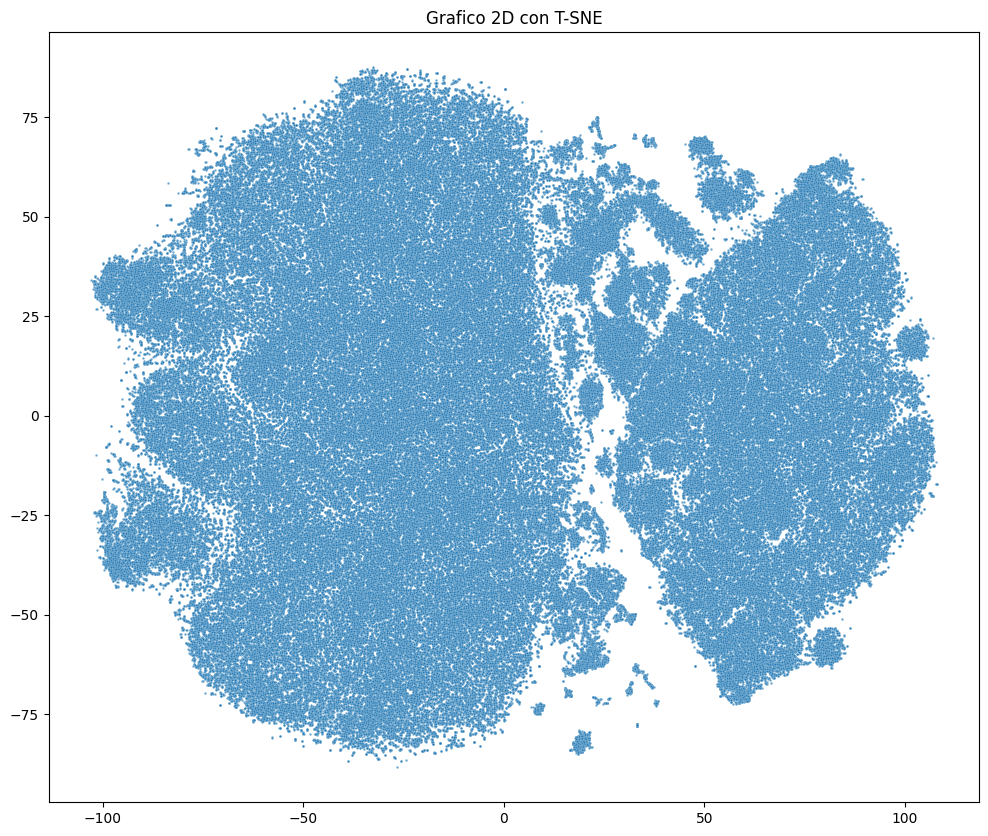

In [43]:
plt.figure(figsize = (12,10))
plt.title('Grafico 2D con T-SNE')
sns.scatterplot(
    x = X__din_tsne[:,0],
    y = X__din_tsne[:,1],
    alpha = 0.7,
    s = 3
)
plt.plot()

In [98]:
X_din_sample = df_dinamicas.sample(n = 20000 , random_state=seed)

In [99]:
X_din_sample

,speed,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4
66933,6.843944,7.383954,7.478524,7.599012,7.886093,-0.741803,0.144450,8.972271,9.004042,1.642863,2.507528,3.194173,4.380575,9.974724,10.307837,16.602689,12.345581
342015,20.444765,20.444519,20.396515,20.353498,20.312246,-1.020927,-0.719059,10.783484,10.855546,-0.658671,9.757996,0.452677,9.790671,11.311517,12.765515,10.469650,10.396329
243923,20.528004,20.500576,20.479212,20.544447,20.537240,0.425569,0.112727,11.782265,11.790487,0.783285,6.769816,0.241597,6.819260,10.199246,11.260343,11.202294,12.788397
79422,4.166407,5.395749,6.081400,6.567088,6.622751,0.758962,2.512515,9.897829,10.239911,-2.166748,4.717509,-4.618327,6.948283,13.556518,11.040462,11.792117,12.422747
2358,18.230890,17.874756,17.503235,17.148950,16.647470,-0.381875,0.659603,11.523692,11.548869,3.601074,7.756551,0.488281,8.565643,10.663895,12.543188,11.976700,11.206788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268043,6.626836,6.537175,6.611423,6.624919,6.619088,0.197921,0.414596,12.860055,12.868259,-2.329508,-0.839233,1.612345,2.954755,12.702071,8.466230,7.709871,13.574217
260411,21.801510,21.933010,22.167635,22.266422,22.326300,-1.830500,-0.566029,11.978723,12.130990,1.703898,2.927144,3.788418,5.081688,11.030110,11.063904,10.493589,8.472788
170939,5.321931,4.477822,4.543629,4.062129,3.702830,0.575007,2.022302,11.978590,12.161700,-1.286825,4.409790,-3.163656,5.577713,11.429026,16.435429,8.612825,11.203287
264390,14.944882,15.666540,16.019617,16.298240,16.547714,-0.725244,-1.376267,11.694278,11.797298,2.388000,-4.053752,-0.358582,4.718477,10.574987,12.764306,11.133603,11.546493


In [100]:
sclr = StandardScaler()
X_din = sclr.fit_transform(X_din_sample)

## Clustering Jerarquico

In [101]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
range_clusters = range(2,10)

for i in range_clusters:
    clusterer = AgglomerativeClustering(n_clusters=i, metric = 'euclidean', linkage='ward')
    c_labels = clusterer.fit_predict(X_din)
    sil_avg = silhouette_score(X_din, c_labels)
    silhouette_scores.append(sil_avg)
    davies_bouldin_ = davies_bouldin_score(X_din, c_labels); 
    davies_bouldin_scores.append(davies_bouldin_)
    calinski_harabasz_ = calinski_harabasz_score(X_din, c_labels); 
    calinski_harabasz_scores.append(calinski_harabasz_)

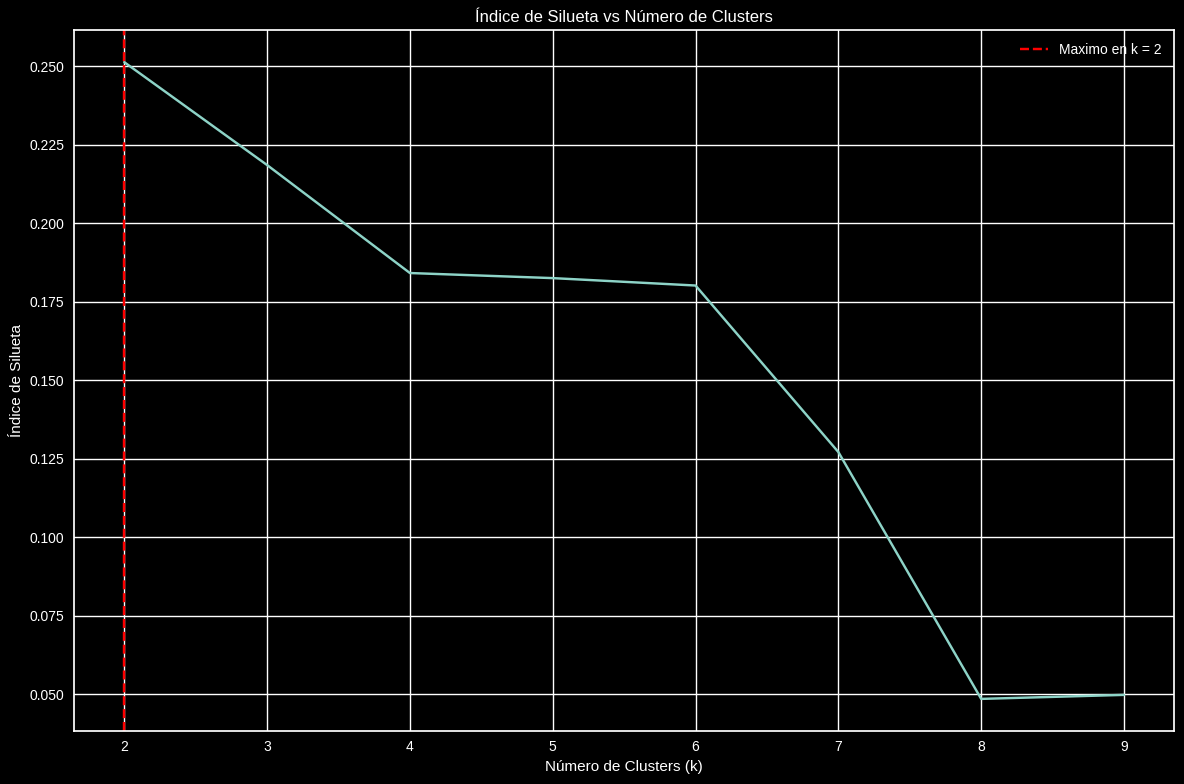

In [102]:
max_score = max(silhouette_scores)
best = range_clusters[silhouette_scores.index(max_score)]
plt.style.use('dark_background')
plt.figure(figsize = (12,8))
plt.plot(range_clusters, silhouette_scores,linestyle='-')
plt.axvline(x = best, color = 'red', linestyle='--', label = f'Maximo en k = {best}')
plt.title('Índice de Silueta vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silueta')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

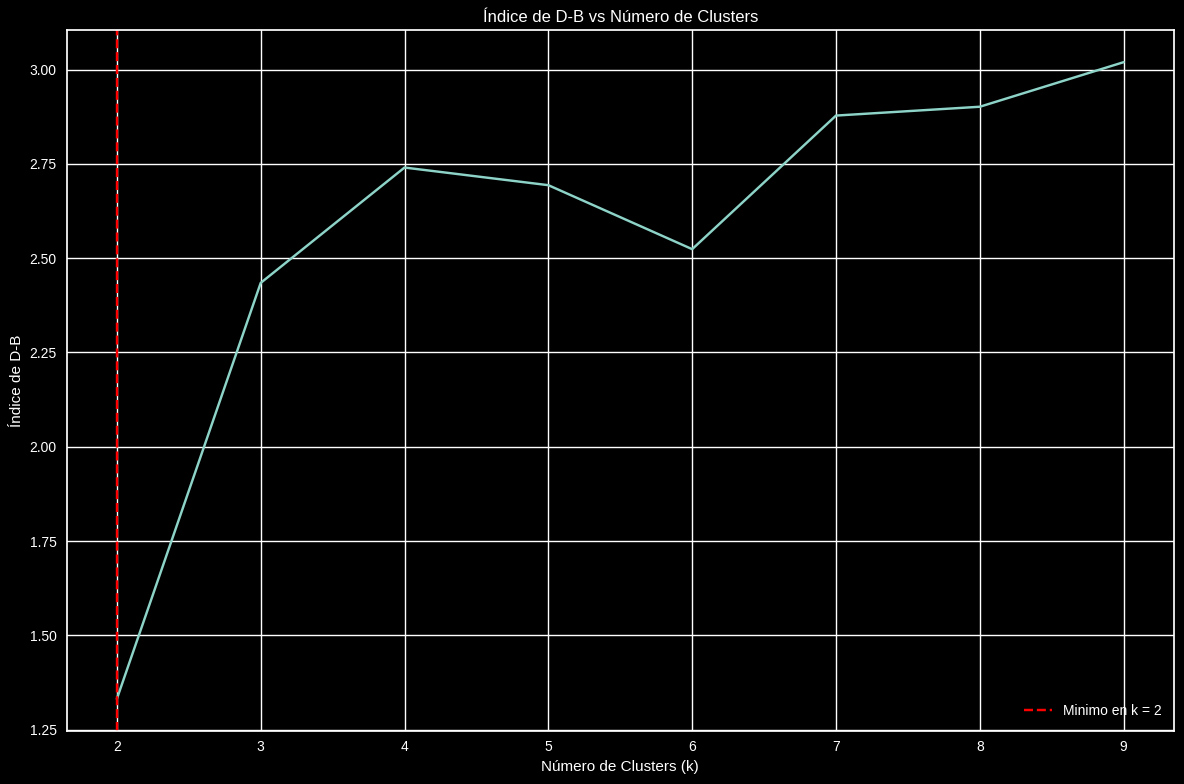

In [103]:
min_score = min(davies_bouldin_scores)
best = range_clusters[davies_bouldin_scores.index(min_score)]
plt.style.use('dark_background')
plt.figure(figsize = (12,8))
plt.plot(range_clusters, davies_bouldin_scores,linestyle='-')
plt.axvline(x = best, color = 'red', linestyle='--', label = f'Minimo en k = {best}')
plt.title('Índice de D-B vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de D-B')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

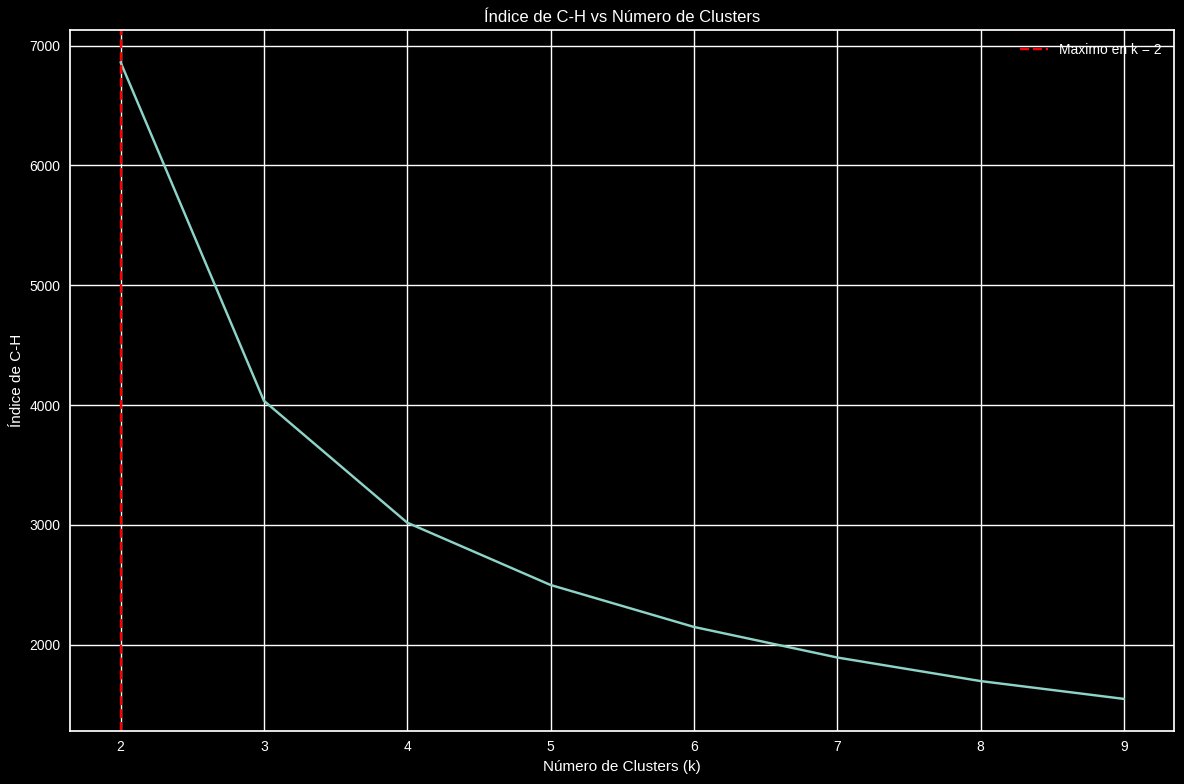

In [104]:
max_score = max(calinski_harabasz_scores)
best = range_clusters[calinski_harabasz_scores.index(max_score)]
plt.style.use('dark_background')
plt.figure(figsize = (12,8))
plt.plot(range_clusters, calinski_harabasz_scores,linestyle='-')
plt.axvline(x = best, color = 'red', linestyle='--', label = f'Maximo en k = {best}')
plt.title('Índice de C-H vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de C-H')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [105]:
clusterer = AgglomerativeClustering(n_clusters=2, metric = 'euclidean', linkage='ward')
c_labels = clusterer.fit_predict(X_din)
X_din_sample['Grupo'] = c_labels

In [106]:
X_din_sample

,speed,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,Grupo
66933,6.843944,7.383954,7.478524,7.599012,7.886093,-0.741803,0.144450,8.972271,9.004042,1.642863,2.507528,3.194173,4.380575,9.974724,10.307837,16.602689,12.345581,0
342015,20.444765,20.444519,20.396515,20.353498,20.312246,-1.020927,-0.719059,10.783484,10.855546,-0.658671,9.757996,0.452677,9.790671,11.311517,12.765515,10.469650,10.396329,1
243923,20.528004,20.500576,20.479212,20.544447,20.537240,0.425569,0.112727,11.782265,11.790487,0.783285,6.769816,0.241597,6.819260,10.199246,11.260343,11.202294,12.788397,1
79422,4.166407,5.395749,6.081400,6.567088,6.622751,0.758962,2.512515,9.897829,10.239911,-2.166748,4.717509,-4.618327,6.948283,13.556518,11.040462,11.792117,12.422747,0
2358,18.230890,17.874756,17.503235,17.148950,16.647470,-0.381875,0.659603,11.523692,11.548869,3.601074,7.756551,0.488281,8.565643,10.663895,12.543188,11.976700,11.206788,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268043,6.626836,6.537175,6.611423,6.624919,6.619088,0.197921,0.414596,12.860055,12.868259,-2.329508,-0.839233,1.612345,2.954755,12.702071,8.466230,7.709871,13.574217,0
260411,21.801510,21.933010,22.167635,22.266422,22.326300,-1.830500,-0.566029,11.978723,12.130990,1.703898,2.927144,3.788418,5.081688,11.030110,11.063904,10.493589,8.472788,1
170939,5.321931,4.477822,4.543629,4.062129,3.702830,0.575007,2.022302,11.978590,12.161700,-1.286825,4.409790,-3.163656,5.577713,11.429026,16.435429,8.612825,11.203287,0
264390,14.944882,15.666540,16.019617,16.298240,16.547714,-0.725244,-1.376267,11.694278,11.797298,2.388000,-4.053752,-0.358582,4.718477,10.574987,12.764306,11.133603,11.546493,1


In [107]:
df_an

,timestamp,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Grupo,Grupo_s
0,2019-12-24 20:21:38.990000010,-27.717755,-51.098985,3.236828,0,0,1,1,11.802369,3.236828,2.457934,1.793759,0.717635,-0.731628,0.106342,11.219029,11.243363,-0.719706,2.052307,-5.734762,6.133305,11.640243,11.500847,11.034913,11.178157,1,0,0,0,NaN,NaN
1,2019-12-24 20:21:39.000000000,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.693321,-0.030127,11.040661,11.062450,-0.498454,1.902262,-3.115336,3.684071,11.655013,11.715343,11.057294,11.239022,1,0,0,0,NaN,NaN
2,2019-12-24 20:21:39.009999990,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.829192,0.115919,11.173141,11.204466,-0.139872,1.258850,-2.545675,2.843365,11.604243,11.809643,11.396549,11.211858,1,0,0,0,NaN,NaN
3,2019-12-24 20:21:39.019999981,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.963666,0.234233,11.747150,11.788938,-0.310262,0.890096,-0.600179,1.117474,11.444361,11.484994,11.546067,11.694704,1,0,0,0,NaN,NaN
4,2019-12-24 20:21:39.029999971,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.666985,-0.276929,11.051834,11.075405,-1.070658,-0.384013,0.910441,1.456941,11.456193,11.666853,11.355733,11.365829,1,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95196,2019-12-24 21:53:23.950000048,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-0.912989,-1.304042,10.935516,11.050773,0.859578,2.380371,-0.091553,2.532474,11.142183,11.236468,11.084578,11.219388,1,0,0,0,NaN,NaN
95197,2019-12-24 21:53:23.960000038,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.274114,-1.855506,11.222022,11.445525,-0.605265,-1.022339,-0.523885,1.298452,11.493950,11.254312,11.759345,12.291465,1,0,0,0,NaN,NaN
95198,2019-12-24 21:53:23.970000029,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.363099,-1.665965,11.078370,11.285556,-0.986735,-2.176921,-0.597636,2.463696,11.023920,11.491217,11.567065,11.503020,1,0,0,0,NaN,NaN
95199,2019-12-24 21:53:23.980000019,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.038285,-1.295263,11.232597,11.354601,0.287374,-0.864665,-0.559489,1.069232,11.422023,11.542409,11.175456,10.719307,1,0,0,0,NaN,NaN


In [109]:
df_an = df.copy()
df_an['Grupo'] = np.nan
df_an.loc[X_din_sample.index, 'Grupo'] = X_din_sample['Grupo']
df_an['Grupo'].value_counts(dropna = False)

Grupo
NaN    324203
0.0     13769
1.0      6231
Name: count, dtype: int64

In [116]:
df_an[df_an['Grupo'] == 1].describe()

,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Grupo
count,6231.000000,6231.000000,6231.000000,6231.0,6231.000000,6231.000000,6231.0,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.000000,6231.0,6231.0,6231.0
mean,-27.703754,-51.110471,20.000643,0.0,0.000160,0.999840,1.0,19.660469,20.024197,20.032881,20.031831,20.019973,-0.690854,-0.103410,11.405055,11.463817,0.602765,0.306259,0.175811,7.249379,11.445495,11.456709,11.454855,11.449452,0.999840,0.000160,0.0,0.0,1.0
std,0.008954,0.005978,2.856268,0.0,0.012668,0.012668,0.0,3.744321,2.798227,2.783408,2.792452,2.831722,0.724959,0.574165,1.008294,1.007914,3.075831,7.423031,2.818625,4.520280,1.018426,1.006093,1.005749,1.006397,0.012668,0.012668,0.0,0.0,0.0
min,-27.717578,-51.125699,9.115602,0.0,0.000000,0.000000,1.0,1.159078,10.865350,10.873204,10.875206,5.338914,-3.628014,-2.879826,5.252878,5.278799,-15.335083,-43.451945,-12.023926,0.207433,3.178579,7.253639,3.081216,6.248942,0.000000,0.000000,0.0,0.0,1.0
25%,-27.711706,-51.113025,18.195384,0.0,0.000000,1.000000,1.0,18.151312,18.197498,18.184457,18.158442,18.176325,-1.090359,-0.444124,10.800443,10.849786,-1.337687,-3.969828,-1.327515,4.018585,10.850484,10.848115,10.849913,10.840993,1.000000,0.000000,0.0,0.0,1.0
50%,-27.704480,-51.110476,20.236794,0.0,0.000000,1.000000,1.0,20.227839,20.227839,20.227839,20.242645,20.242645,-0.680951,-0.071427,11.389217,11.448612,0.569661,0.292460,0.165304,6.243192,11.447783,11.443391,11.455253,11.446248,1.000000,0.000000,0.0,0.0,1.0
75%,-27.696093,-51.107311,21.811690,0.0,0.000000,1.000000,1.0,21.837759,21.827814,21.830240,21.827814,21.819752,-0.249396,0.267752,12.015401,12.078232,2.482096,4.784902,1.622518,9.371768,12.039287,12.067875,12.085759,12.077835,1.000000,0.000000,0.0,0.0,1.0
max,-27.688110,-51.099271,26.874480,0.0,1.000000,1.000000,1.0,26.874480,26.874480,26.874480,26.874480,26.874480,2.318984,1.887828,16.054120,16.078016,14.383952,33.869425,11.400859,44.728665,20.045801,18.859475,18.859475,15.907185,1.000000,1.000000,0.0,0.0,1.0


In [117]:
df_an[df_an['Grupo'] == 0].describe()

,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Grupo
count,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.000000,13769.0
mean,-27.695623,-51.122168,6.138359,0.418694,0.455298,0.126008,0.974653,6.283430,6.113108,6.094661,6.080903,6.071530,-0.761193,-0.105802,11.324285,11.556054,0.461432,0.249363,0.093680,8.788764,11.550011,11.618896,11.581093,11.526388,0.115549,0.654514,0.280485,0.025347,0.0
std,0.012156,0.007891,2.458756,0.493363,0.498016,0.331870,0.157182,2.745713,2.427434,2.415682,2.422809,2.441317,1.088405,1.850246,2.291974,2.269027,3.841823,7.885118,5.871238,5.868735,2.286431,2.286515,2.200671,2.251330,0.319695,0.475544,0.449253,0.157182,0.0
min,-27.718709,-51.132691,0.006364,0.000000,0.000000,0.000000,0.000000,0.006364,0.006364,0.006364,0.006364,0.006364,-5.542377,-9.731831,-2.434504,1.105390,-20.660400,-42.152405,-30.019124,0.088973,1.497867,0.777820,0.593696,1.139796,0.000000,0.000000,0.000000,0.000000,0.0
25%,-27.696900,-51.127996,4.539752,0.000000,0.000000,0.000000,1.000000,4.565474,4.520286,4.527917,4.504519,4.469124,-1.403002,-1.261146,10.154807,10.381959,-1.602173,-3.824870,-2.624512,4.440697,10.356729,10.425860,10.399109,10.356418,0.000000,0.000000,0.000000,0.000000,0.0
50%,-27.690214,-51.124906,5.908943,0.000000,0.000000,0.000000,1.000000,5.989026,5.908630,5.899437,5.906833,5.896495,-0.805649,-0.084595,11.313401,11.483212,0.434875,0.122070,0.216166,7.585516,11.518519,11.539972,11.520813,11.485754,0.000000,1.000000,0.000000,0.000000,0.0
75%,-27.687307,-51.118827,7.361242,1.000000,1.000000,0.000000,1.000000,7.434939,7.350330,7.323677,7.323677,7.304716,-0.098162,1.025117,12.489752,12.706265,2.482096,4.252116,2.878825,11.837334,12.715238,12.807759,12.723746,12.662077,0.000000,1.000000,1.000000,0.000000,0.0
max,-27.681820,-51.099067,17.504475,1.000000,1.000000,1.000000,1.000000,18.598934,17.522518,17.160086,16.615393,16.699130,4.156933,10.128670,24.368584,25.117250,23.335775,52.584330,32.465617,56.722406,23.354033,25.476081,22.174581,25.812071,1.000000,1.000000,1.000000,1.000000,0.0


In [118]:
df_an[df_an['Grupo'] == df_an['good_road']]

,timestamp,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Grupo
1301,2019-12-24 20:21:52.000000000,-27.716673,-51.100215,15.863926,0,0,1,1,16.647470,15.143607,13.021008,13.021008,13.021008,-0.879869,1.106121,11.311406,11.399367,-0.391642,-1.551310,0.127157,1.605028,12.439894,11.827444,12.142871,11.151522,1,0,0,0,1.0
1340,2019-12-24 20:21:52.390000105,-27.716673,-51.100215,15.863926,0,0,1,1,16.647470,15.143607,13.021008,13.021008,13.021008,-0.600945,0.881465,10.864488,10.916740,1.637777,6.281535,-0.467936,6.508376,11.231384,11.988684,11.658611,11.842549,1,0,0,0,1.0
1345,2019-12-24 20:21:52.440000057,-27.716673,-51.100215,15.863926,0,0,1,1,16.647470,15.143607,13.021008,13.021008,13.021008,-0.633466,0.851538,11.572374,11.620939,-0.279744,-1.332601,-0.968933,1.671201,11.685242,11.739584,11.016102,11.338355,1,0,0,0,1.0
1360,2019-12-24 20:21:52.589999914,-27.716673,-51.100215,15.863926,0,0,1,1,16.647470,15.143607,13.021008,13.021008,13.021008,-0.687535,0.821211,10.684723,10.738268,0.577291,-1.126607,-0.124613,1.272021,11.074247,11.601413,10.623947,10.623765,1,0,0,0,1.0
1379,2019-12-24 20:21:52.779999971,-27.716673,-51.100215,15.863926,0,0,1,1,16.647470,15.143607,13.021008,13.021008,13.021008,-0.790087,0.764548,11.700064,11.751608,2.441406,-1.068115,-0.295003,2.681112,12.043391,11.577796,10.981307,11.544722,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343862,2019-12-24 21:53:20.589999914,-27.717511,-51.099383,11.253605,0,0,1,1,4.207797,12.879133,14.253771,15.619594,16.163979,-1.241992,-1.607307,12.045229,12.215298,0.094096,-0.742594,2.031962,2.165449,11.579687,11.206761,11.281212,10.927940,1,0,0,0,1.0
343863,2019-12-24 21:53:20.599999905,-27.717511,-51.099383,11.253605,0,0,1,1,4.207797,12.879133,14.253771,15.619594,16.163979,-1.057439,-1.596933,10.962052,11.128115,1.462301,1.820882,2.258301,3.248670,12.380767,11.969603,11.641563,10.429368,1,0,0,0,1.0
343877,2019-12-24 21:53:20.740000010,-27.717511,-51.099383,11.253605,0,0,1,1,4.207797,12.879133,14.253771,15.619594,16.163979,-1.365493,-1.781286,11.463438,11.681094,-0.483195,0.422160,2.726237,2.800726,9.967970,11.786913,10.310141,11.640421,1,0,0,0,1.0
343886,2019-12-24 21:53:20.829999924,-27.717511,-51.099383,11.253605,0,0,1,1,4.207797,12.879133,14.253771,15.619594,16.163979,-1.431733,-1.965241,11.100317,11.363497,1.271566,2.601624,2.309163,3.703722,11.429673,10.204331,11.778250,10.316158,1,0,0,0,1.0


In [134]:
df_an_Group = df_an[df_an['Grupo'].notna()].copy()

In [135]:
df_an_Group

,timestamp,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Grupo
27,2019-12-24 20:21:39.259999990,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-1.177748,-0.167993,11.428722,11.490474,0.381470,0.180562,-1.286825,1.354267,11.804122,11.383398,11.613216,11.228022,1,0,0,0,0.0
63,2019-12-24 20:21:39.619999886,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-1.090359,-0.334590,11.311805,11.369158,0.523885,0.862122,-0.244141,1.037937,11.575855,11.456568,11.264163,11.640951,1,0,0,0,0.0
77,2019-12-24 20:21:39.759999990,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.877275,-0.035115,11.297041,11.331106,0.745138,-0.439962,-1.721700,1.926927,11.579200,11.795752,11.872206,11.856566,1,0,0,0,0.0
99,2019-12-24 20:21:39.980000019,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-1.030903,0.210889,11.257736,11.306805,0.874837,-0.706991,-0.236511,1.149397,10.851886,11.665277,11.334551,11.052605,1,0,0,0,0.0
102,2019-12-24 20:21:40.009999990,-27.717644,-51.099113,8.194791,0,0,1,1,11.827536,4.299495,3.236828,3.236828,2.457934,-1.089362,0.366712,11.533268,11.590404,0.768026,-0.600179,-0.152588,0.986591,11.204466,11.604243,11.809643,11.396549,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344086,2019-12-24 21:53:22.829999924,-27.717627,-51.099250,8.633176,0,0,1,1,1.755696,9.115602,11.253605,12.879133,14.253771,-0.811634,-0.772330,11.555215,11.609403,0.251770,1.764933,0.236511,1.798420,12.073089,11.363497,11.429673,10.204331,1,0,0,0,0.0
344088,2019-12-24 21:53:22.849999905,-27.717627,-51.099250,8.633176,0,0,1,1,1.755696,9.115602,11.253605,12.879133,14.253771,-0.960673,-1.100734,11.384030,11.477397,0.475566,2.034505,0.058492,2.090166,11.398227,11.695065,11.995757,11.958627,1,0,0,0,0.0
344123,2019-12-24 21:53:23.200000048,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-0.480436,-1.288879,11.432313,11.514765,-0.071208,1.612345,-0.386556,1.659564,11.152654,11.528644,11.664928,11.198014,1,0,0,0,0.0
344146,2019-12-24 21:53:23.430000067,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-0.474052,-0.907003,10.884839,10.932845,1.556396,-1.785278,-0.920614,2.541086,11.396055,11.815840,11.471092,15.272424,1,0,0,0,0.0


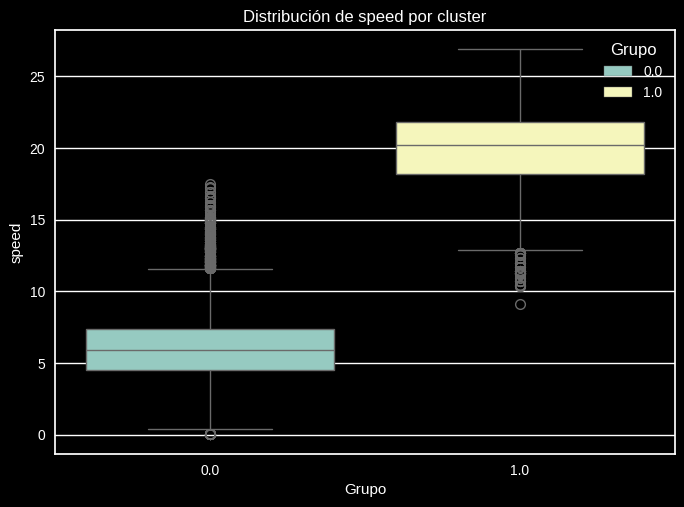

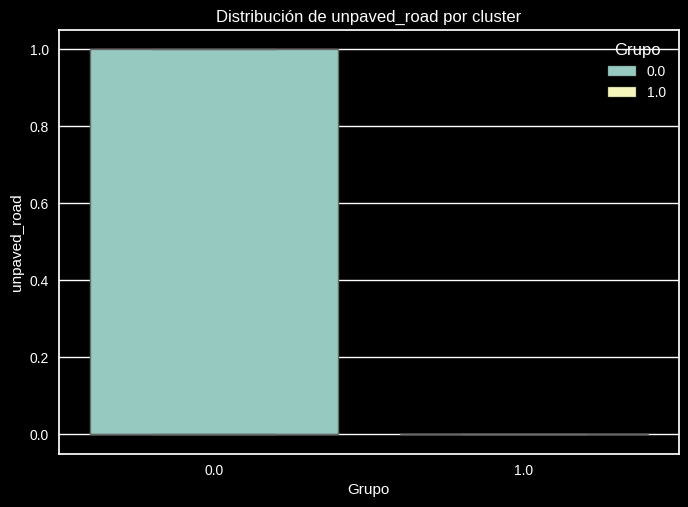

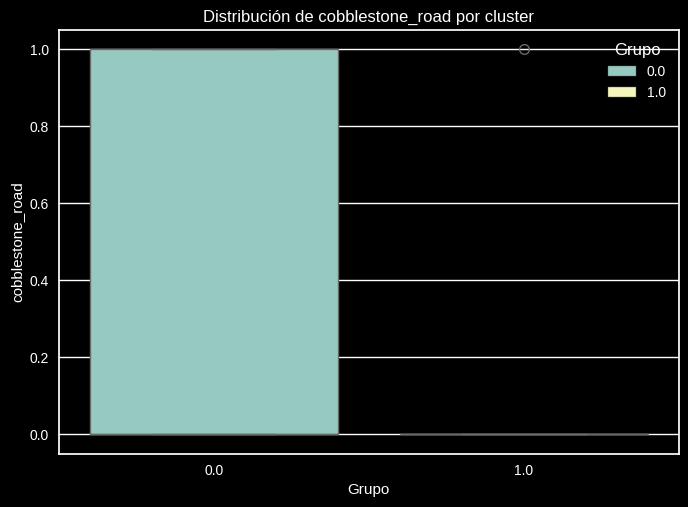

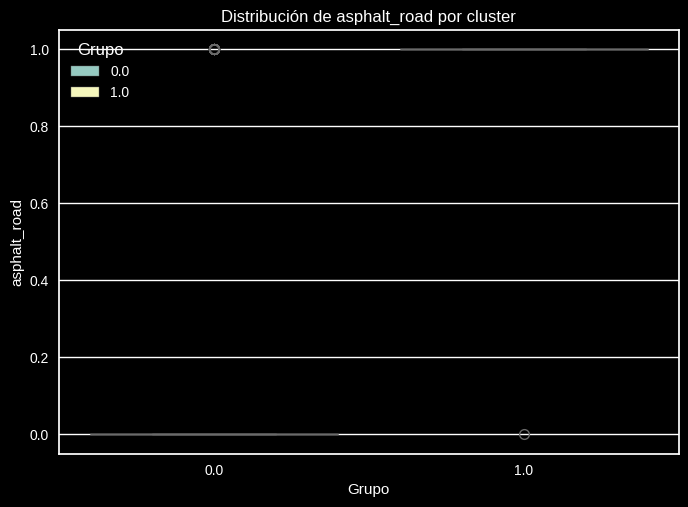

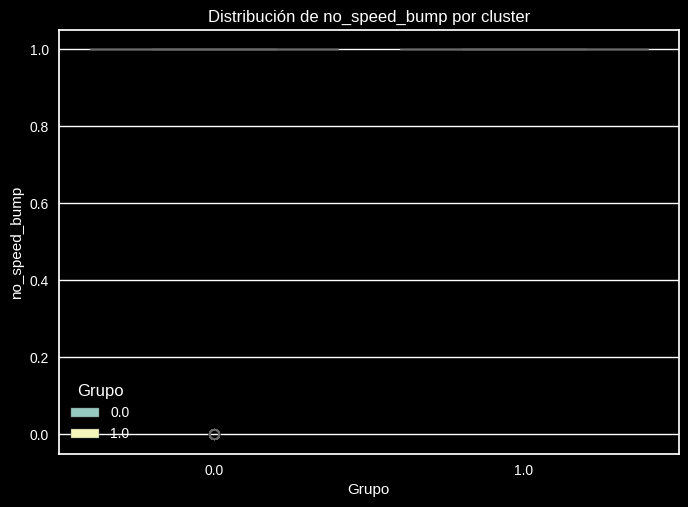

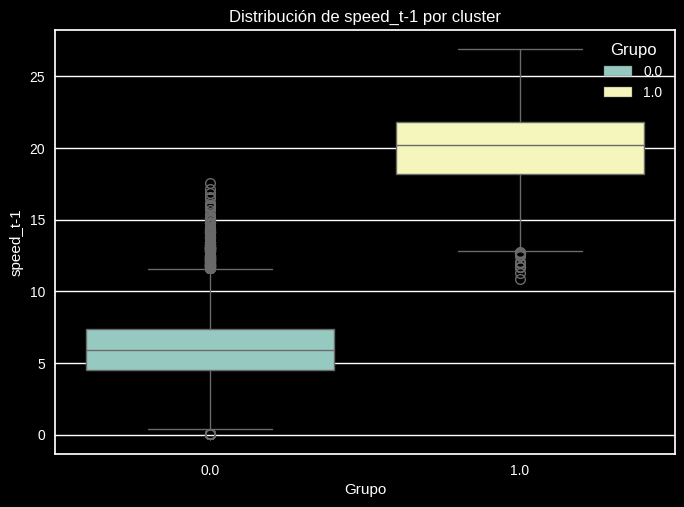

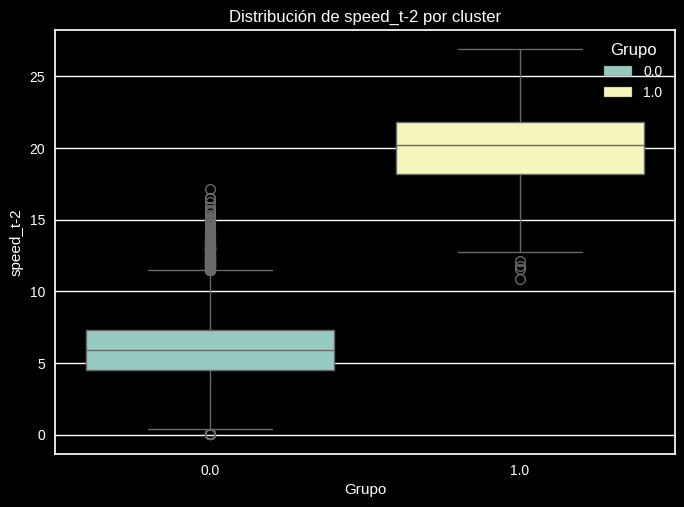

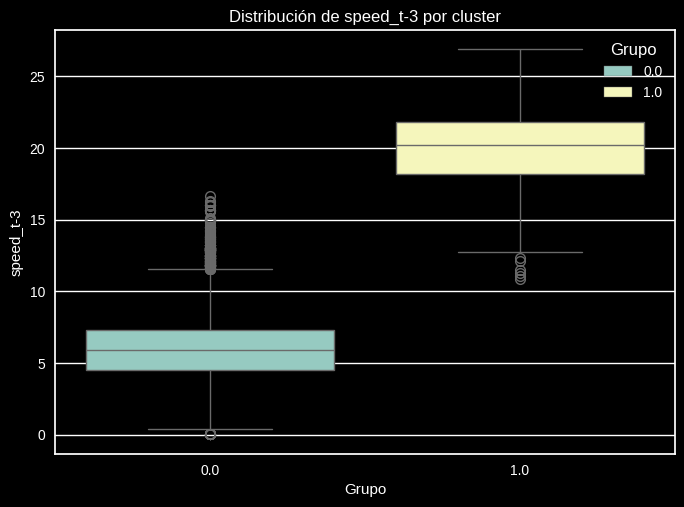

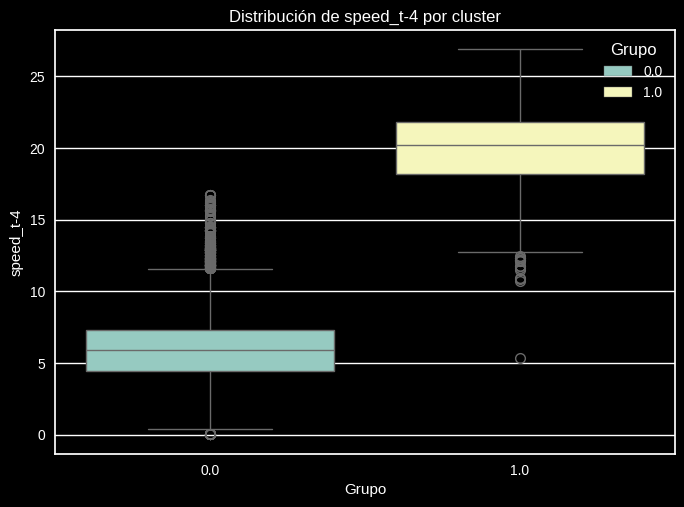

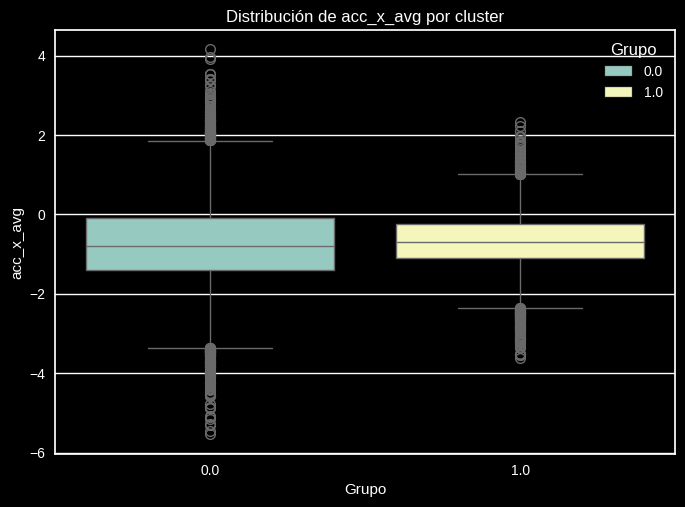

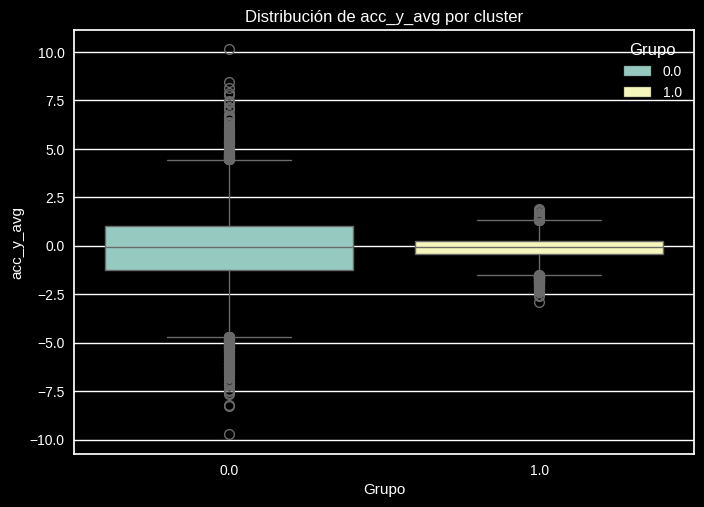

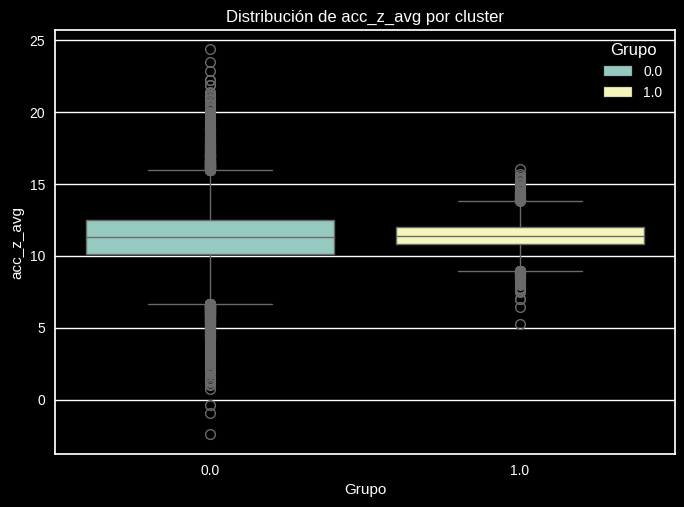

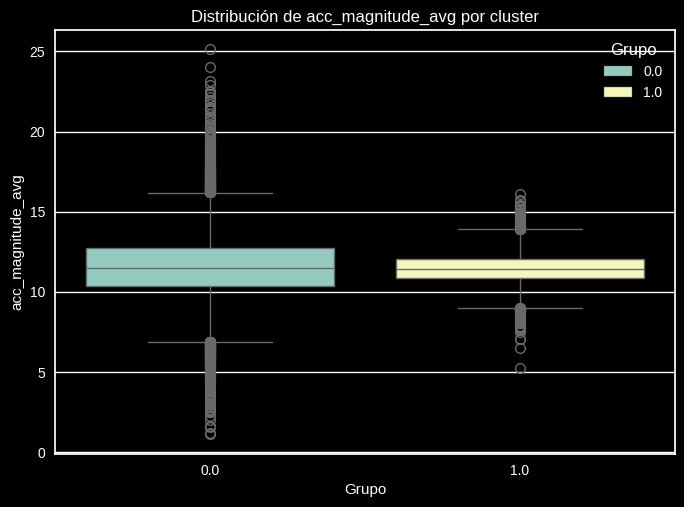

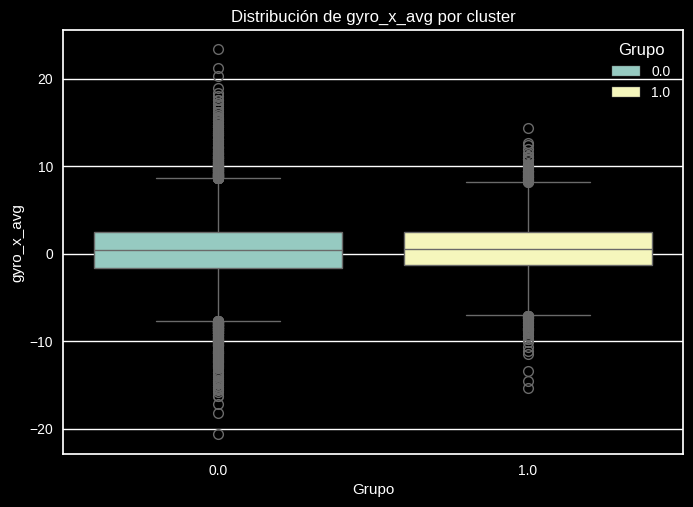

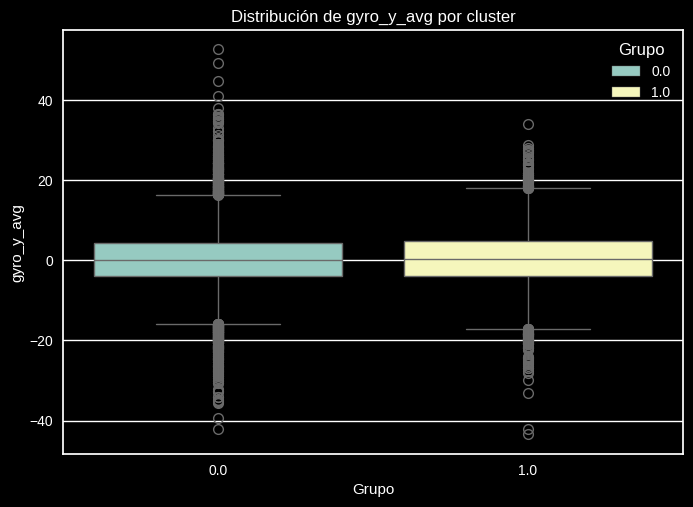

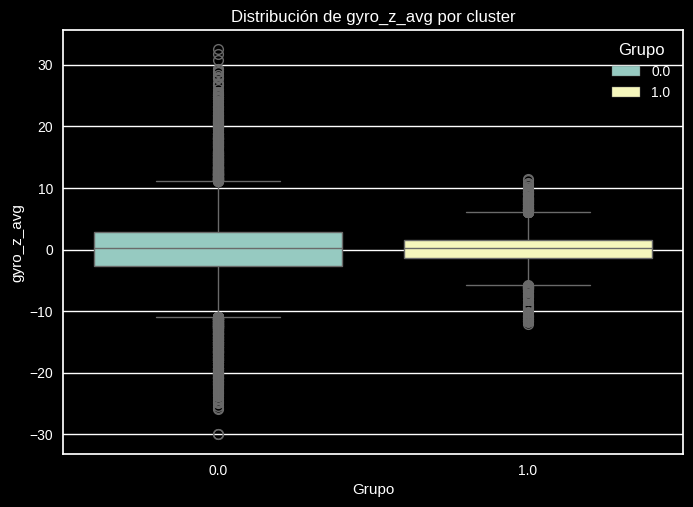

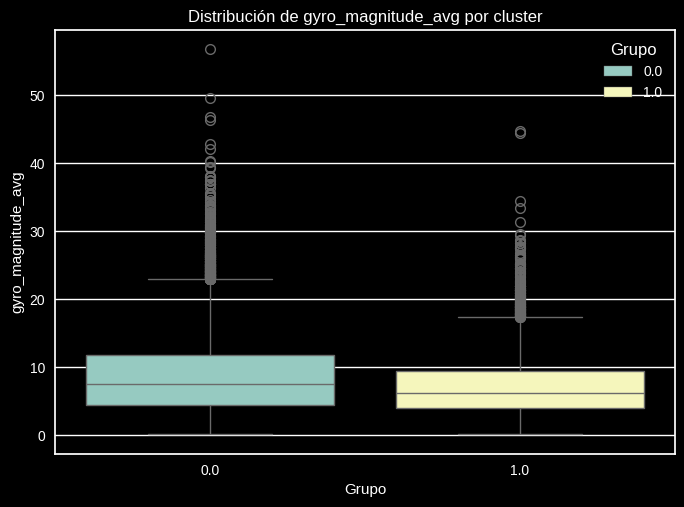

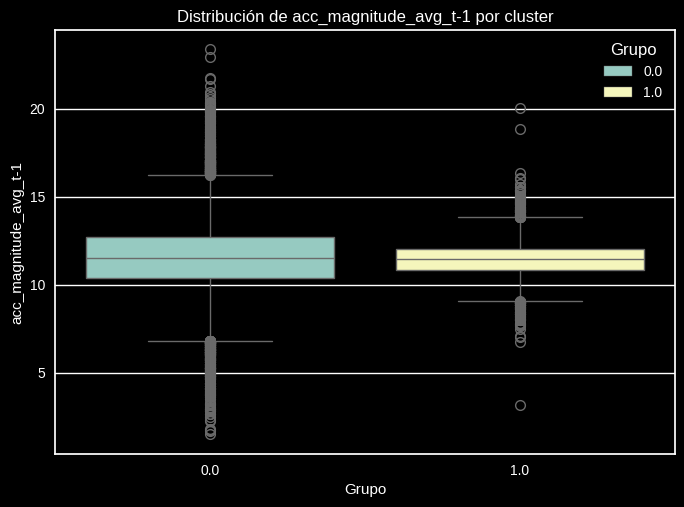

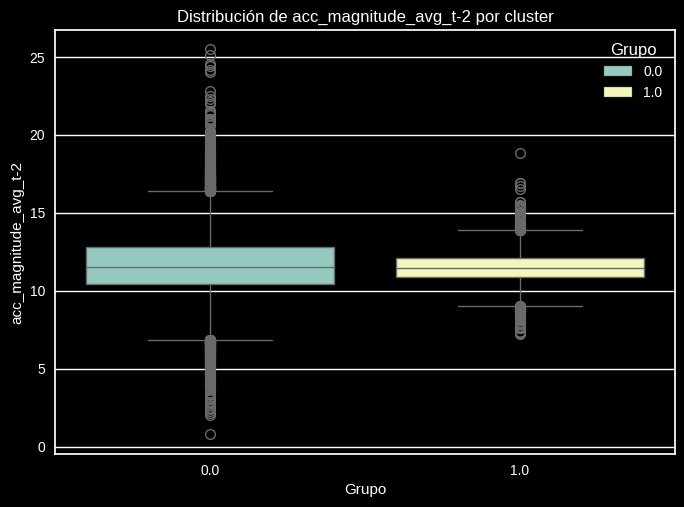

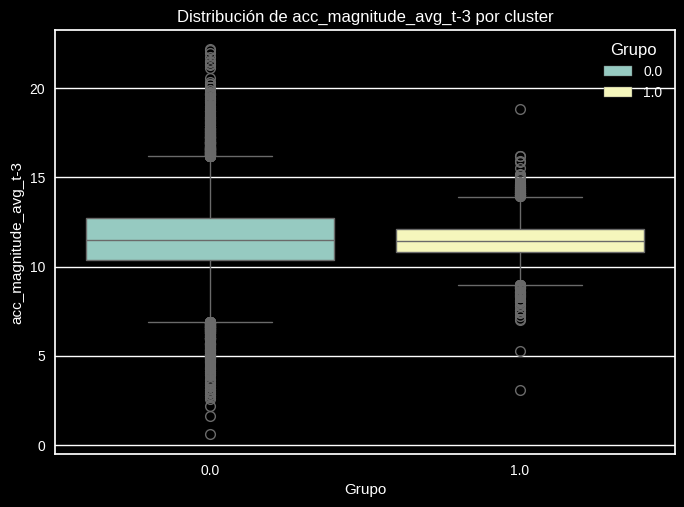

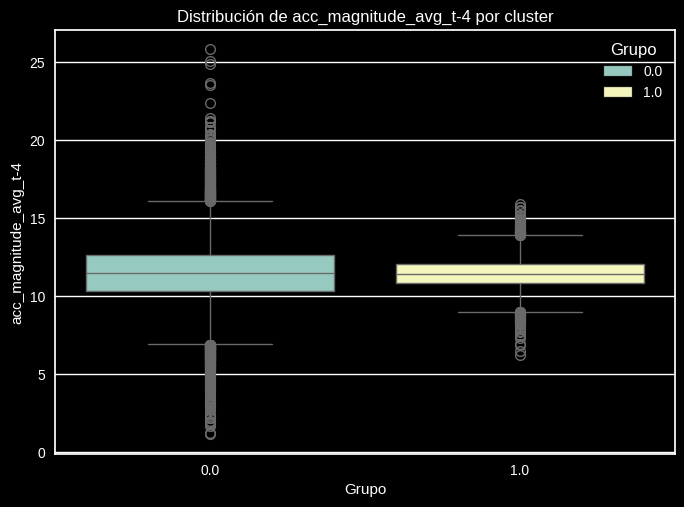

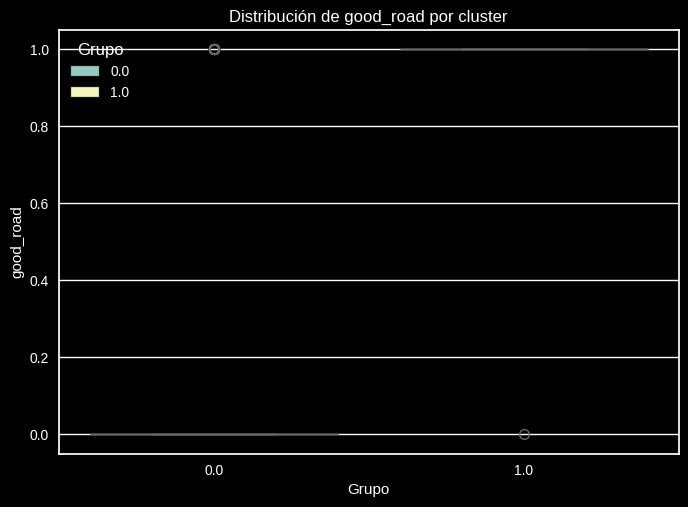

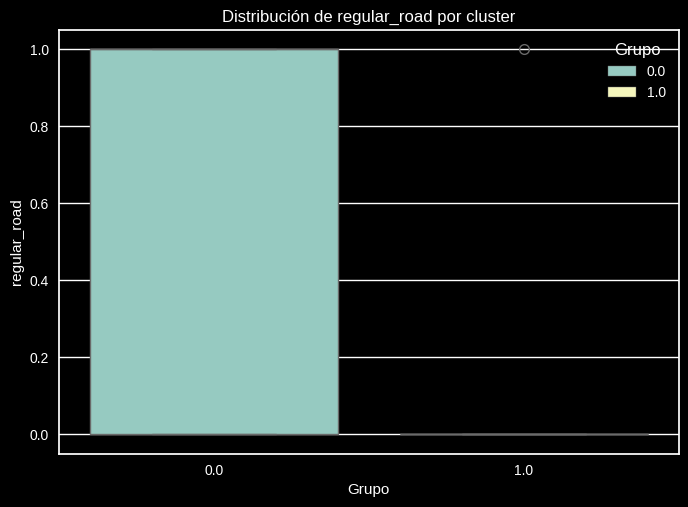

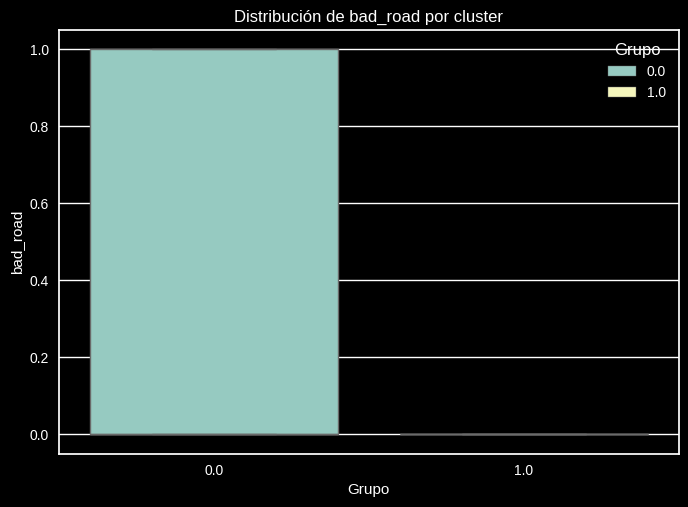

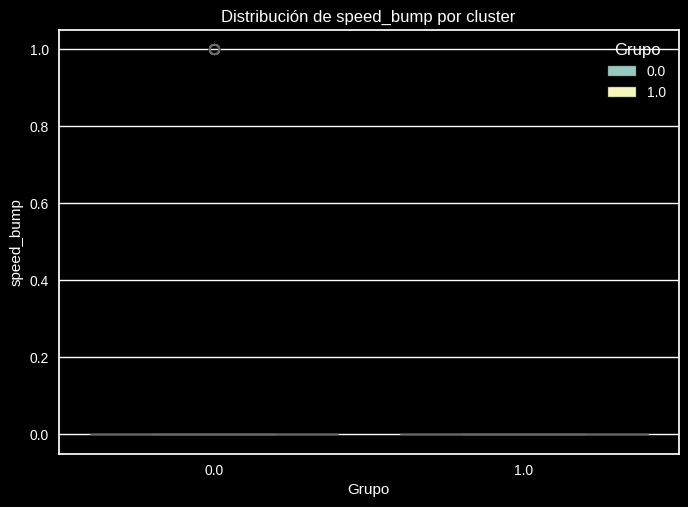

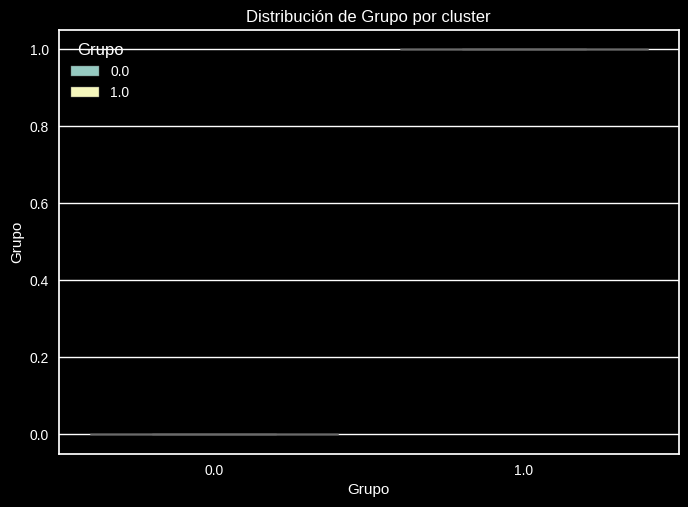

In [143]:
aux = df_an_Group.drop(columns = ['timestamp','latitude','longitude','Speed_Target']).columns

for v in aux:
    sns.boxplot(data = df_an_Group, x = 'Grupo', y = v, hue = 'Grupo')
    plt.title(f'Distribución de {v} por cluster')
    plt.show()

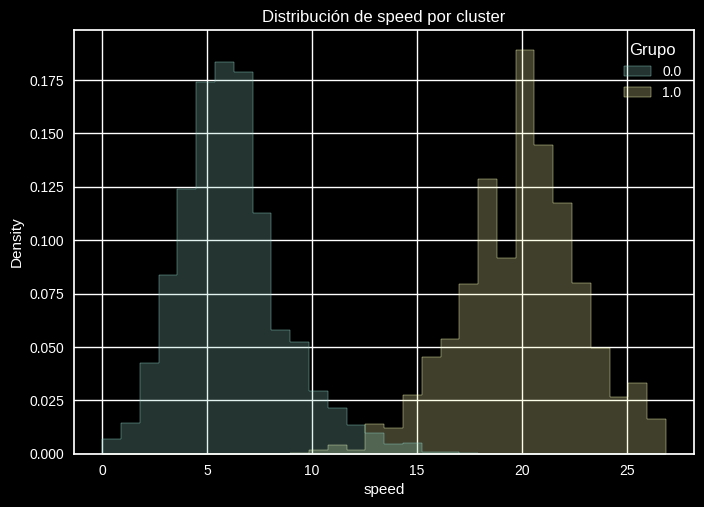

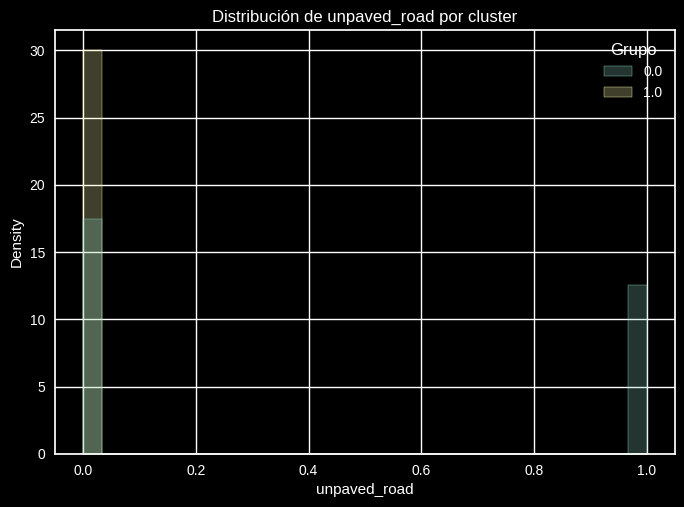

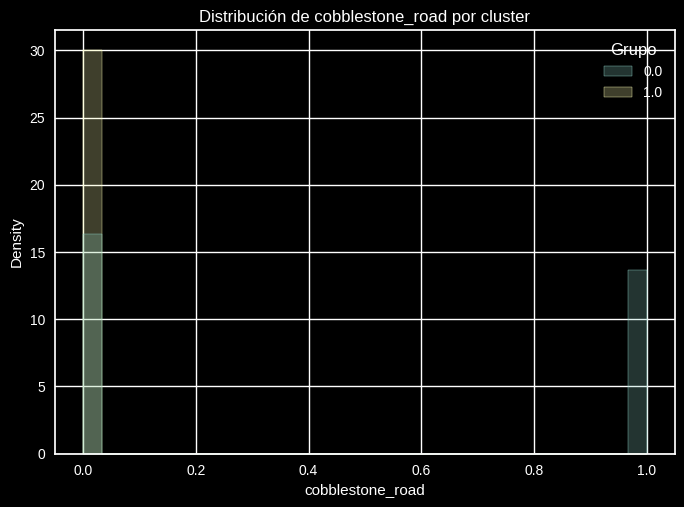

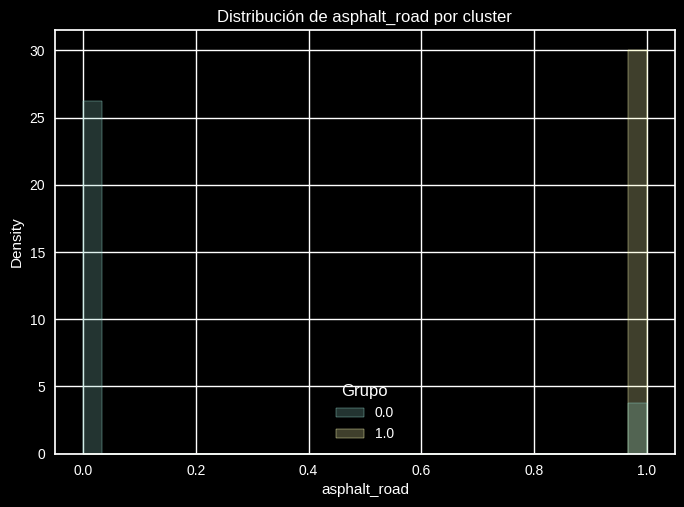

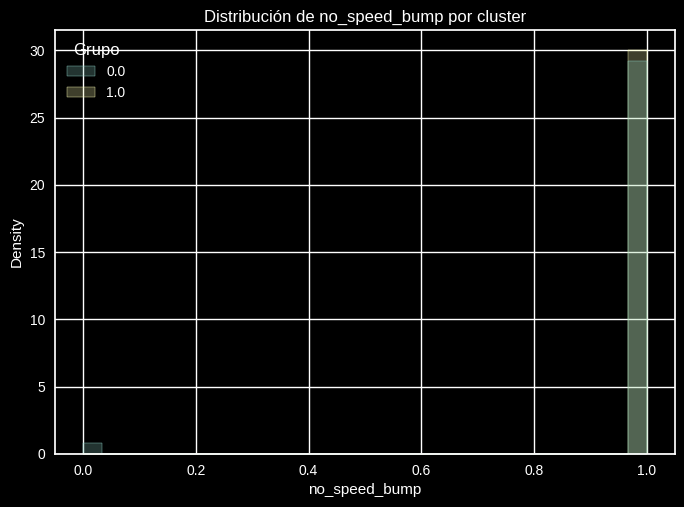

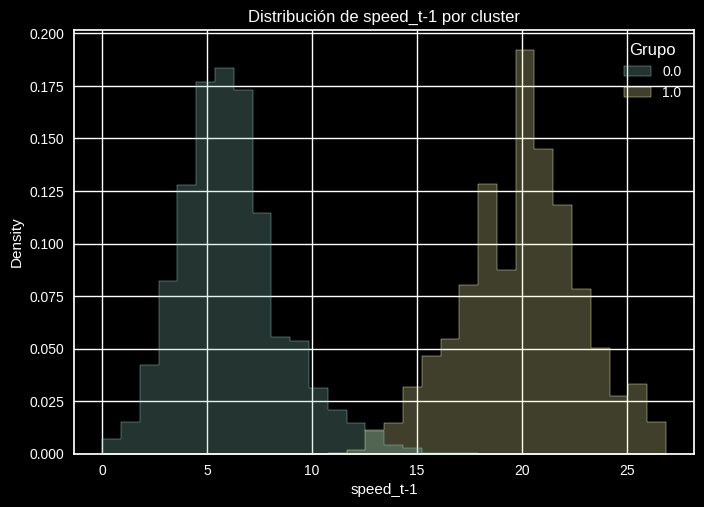

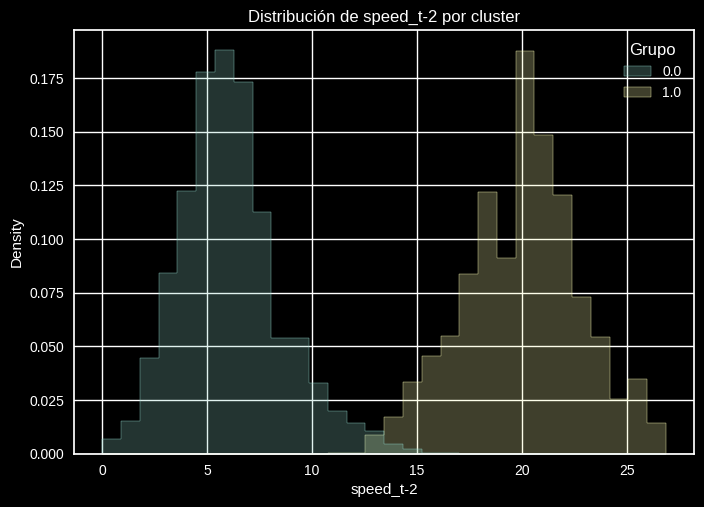

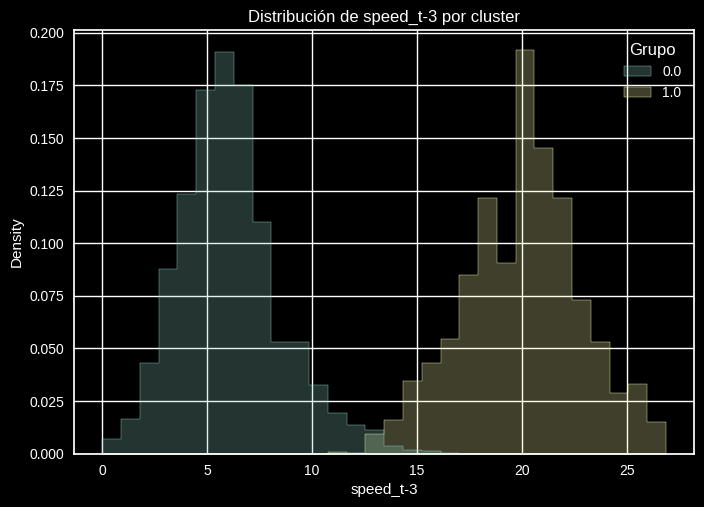

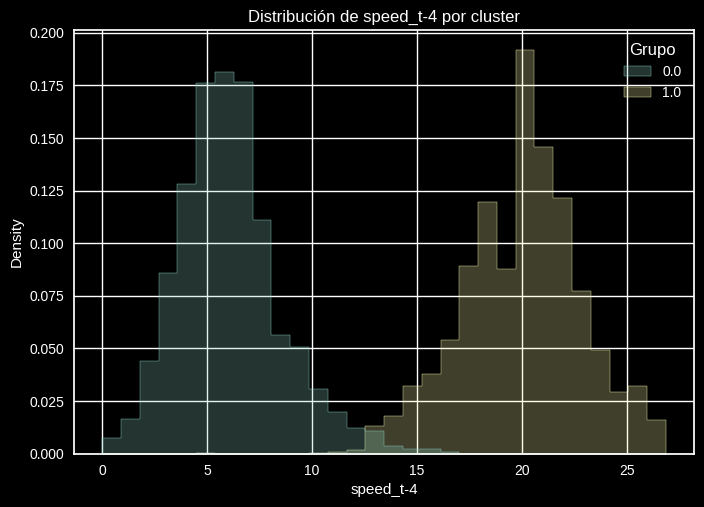

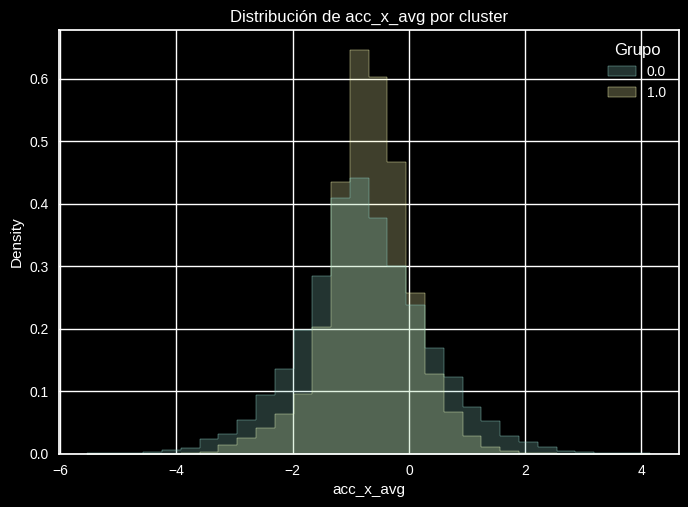

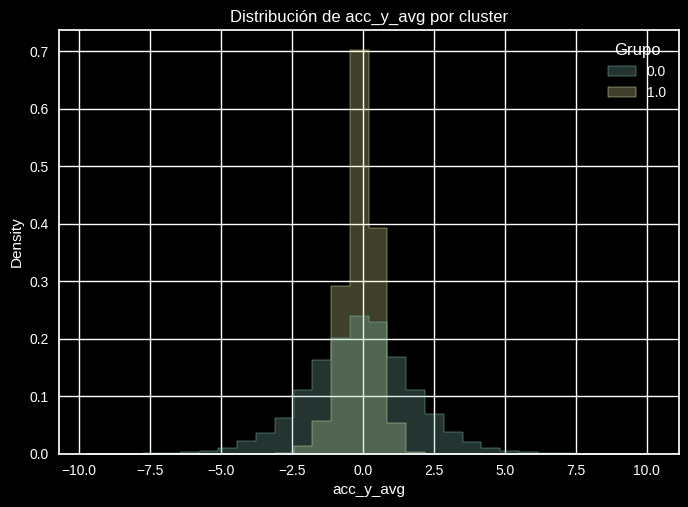

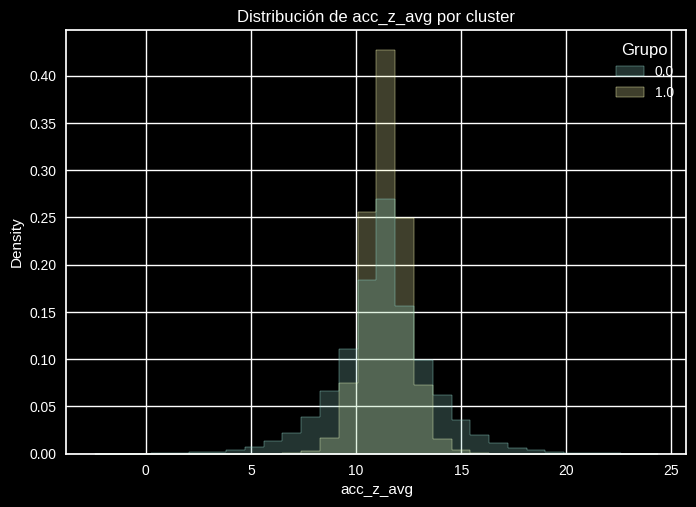

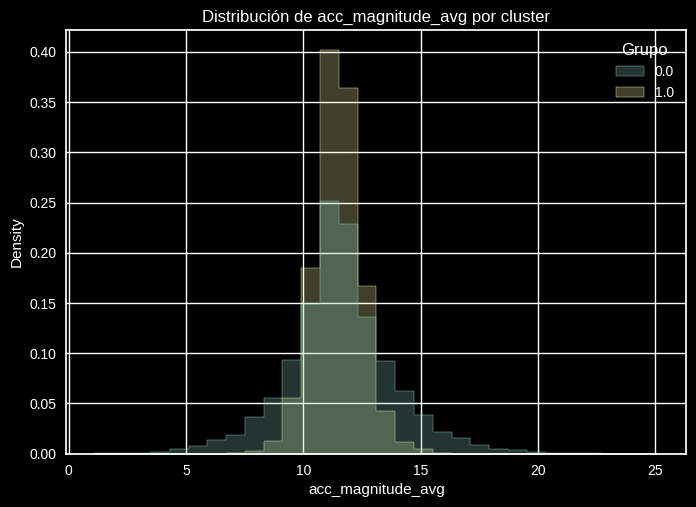

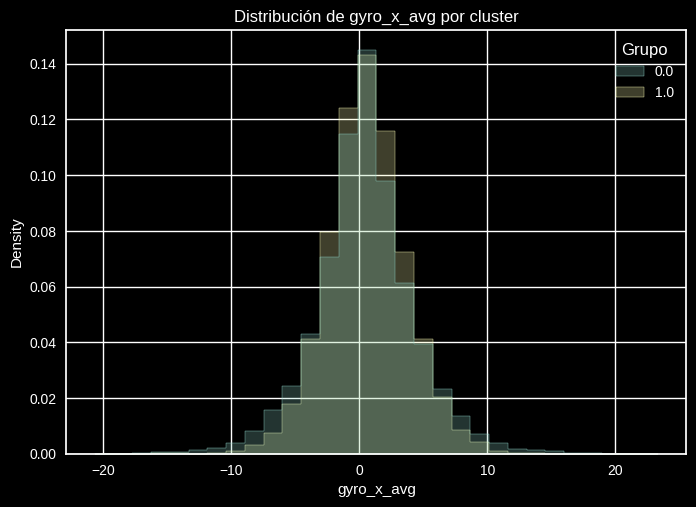

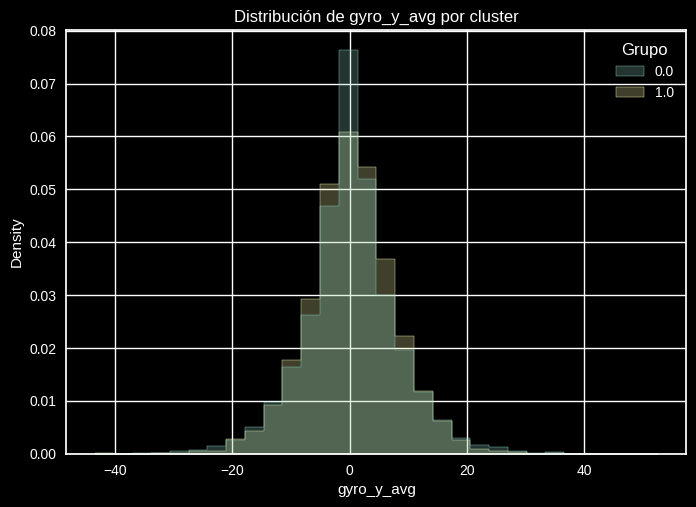

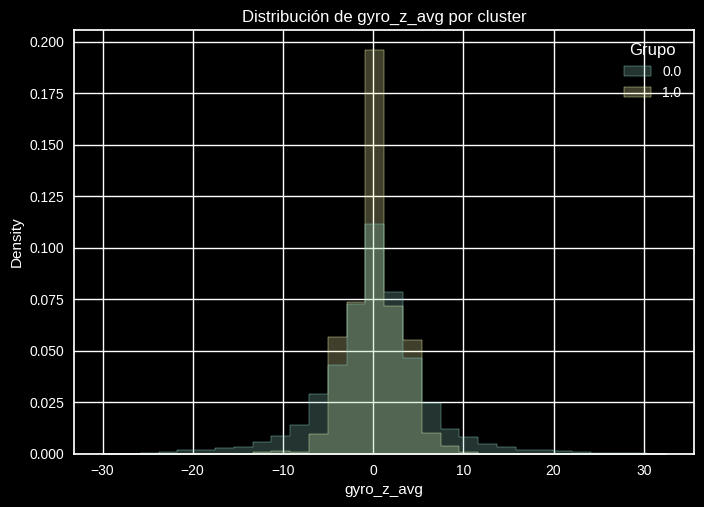

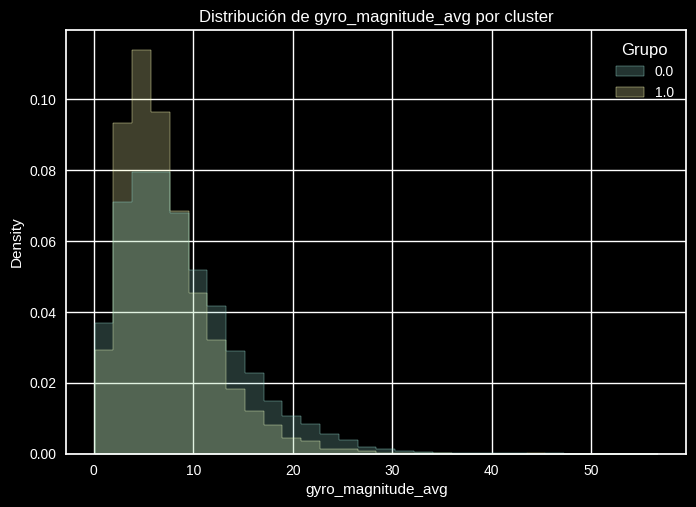

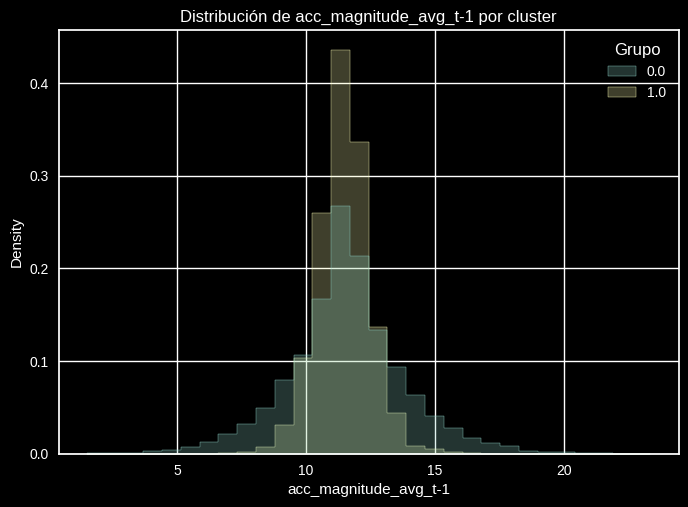

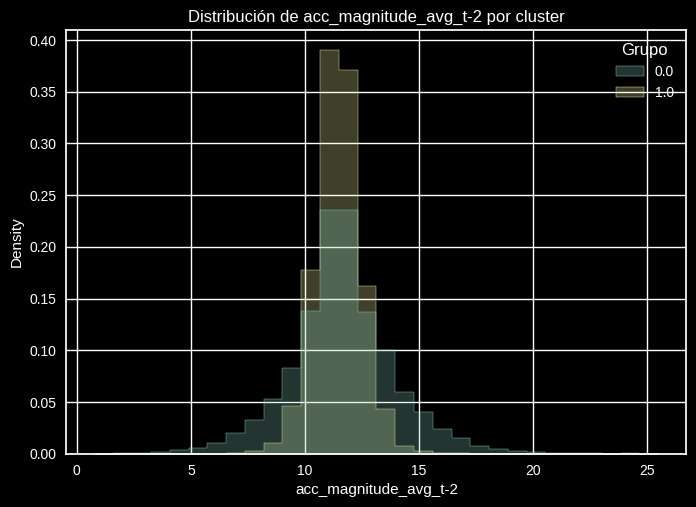

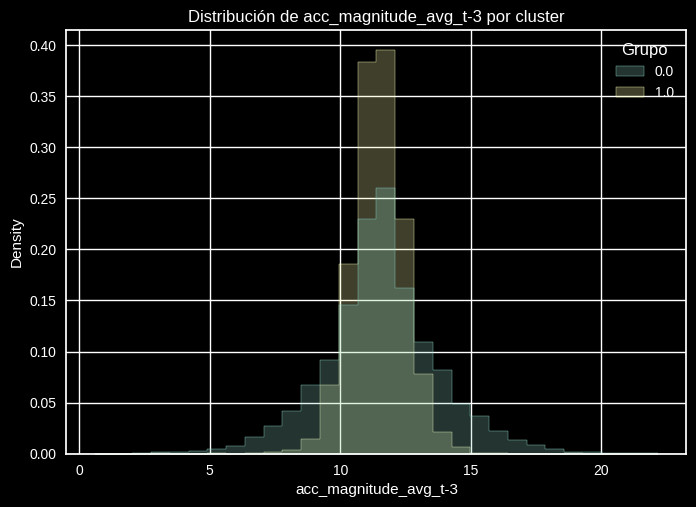

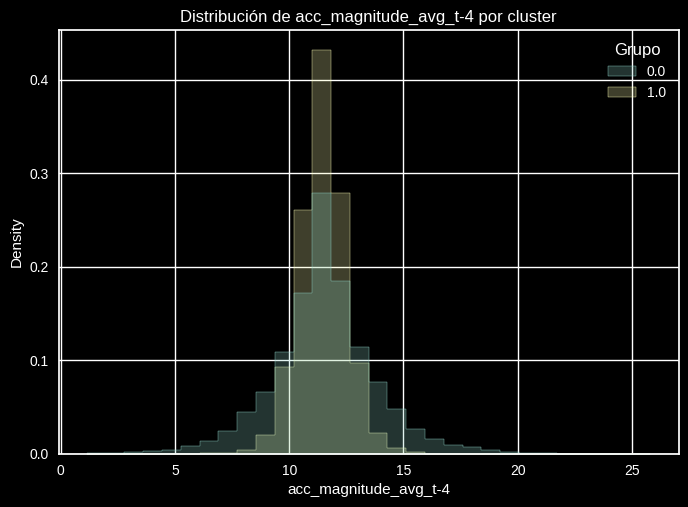

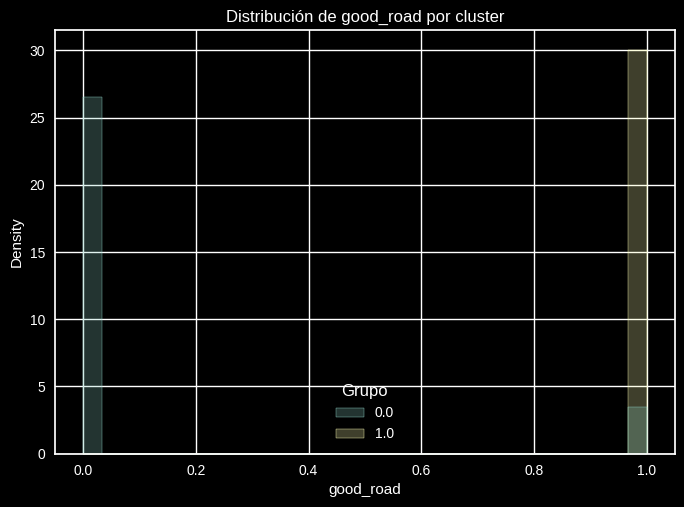

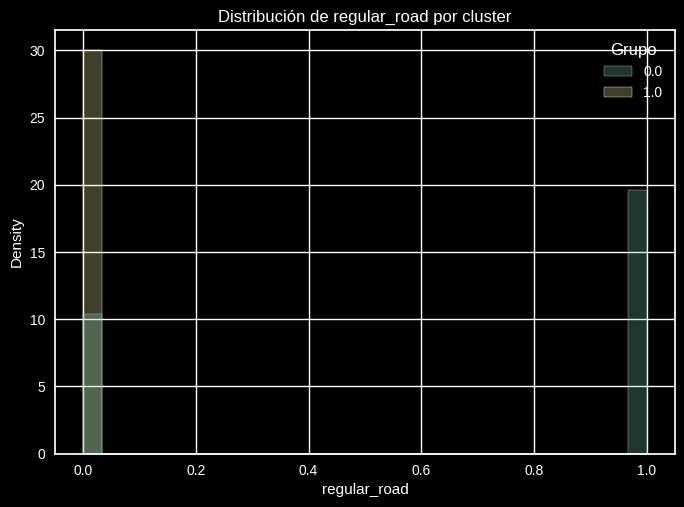

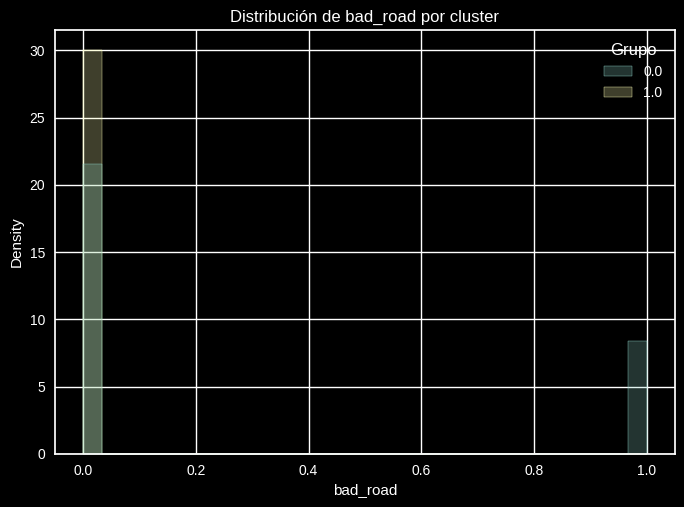

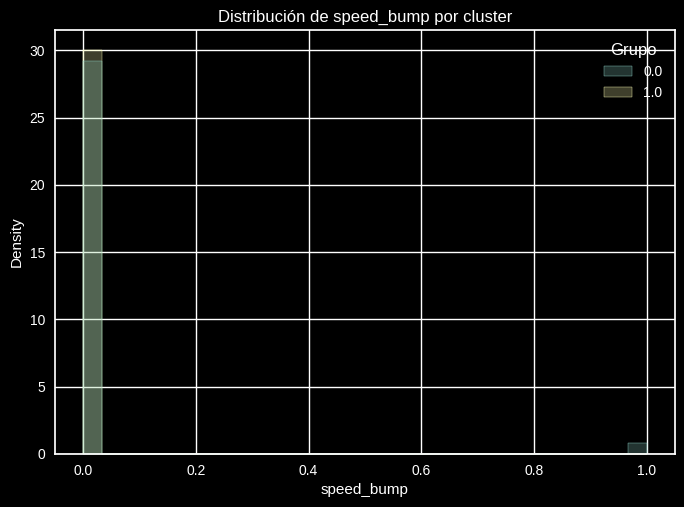

In [145]:
aux = df_an_Group.drop(columns = ['timestamp','latitude','longitude','Speed_Target','Grupo']).columns

for v in aux:
    sns.histplot(data = df_an_Group, x = v, hue = 'Grupo', bins=30, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {v} por cluster')
    plt.show()

## Clustering de Optimizacion

In [147]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
range_clusters = range(2,10)

for i in range_clusters:
    km = KMeans(n_clusters=i, init = 'k-means++', n_init = 10, max_iter = 300, random_state=seed)
    c_labels = km.fit_predict(X_din)
    sil_avg = silhouette_score(X_din, c_labels)
    silhouette_scores.append(sil_avg)
    davies_bouldin_ = davies_bouldin_score(X_din, c_labels); 
    davies_bouldin_scores.append(davies_bouldin_)
    calinski_harabasz_ = calinski_harabasz_score(X_din, c_labels); 
    calinski_harabasz_scores.append(calinski_harabasz_)

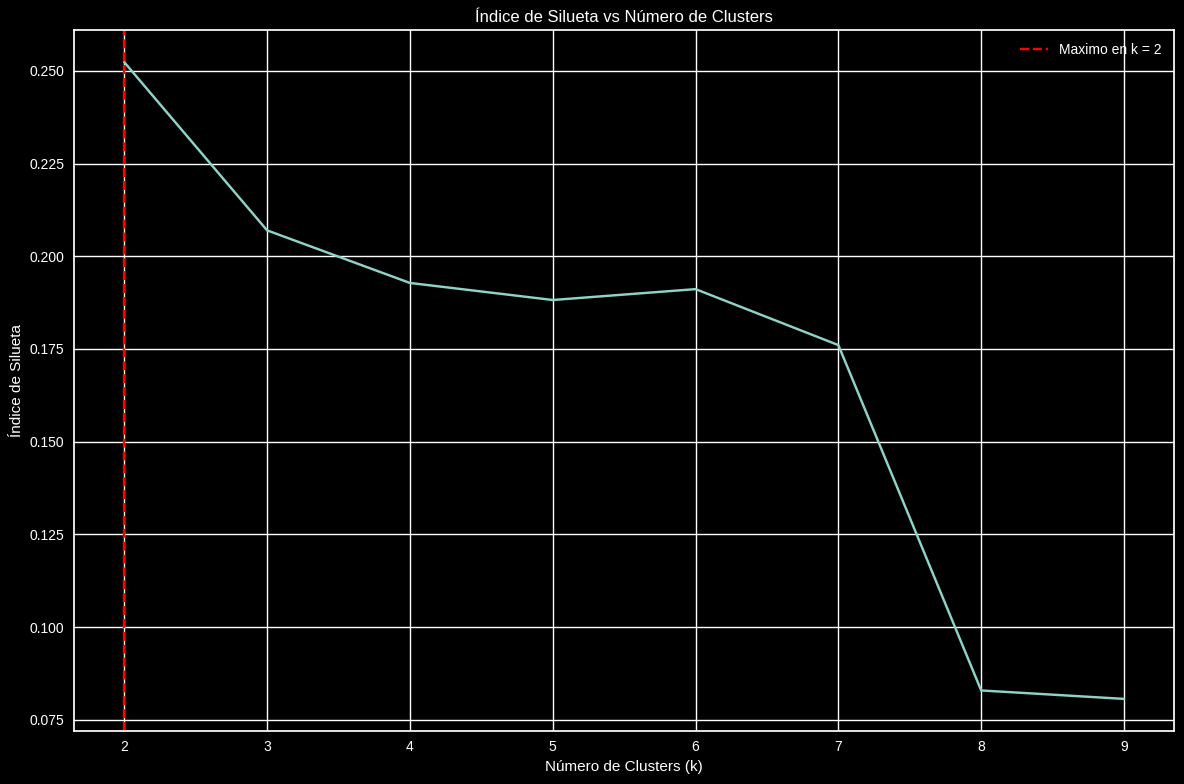

In [148]:
max_score = max(silhouette_scores)
best = range_clusters[silhouette_scores.index(max_score)]
plt.style.use('dark_background')
plt.figure(figsize = (12,8))
plt.plot(range_clusters, silhouette_scores,linestyle='-')
plt.axvline(x = best, color = 'red', linestyle='--', label = f'Maximo en k = {best}')
plt.title('Índice de Silueta vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silueta')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

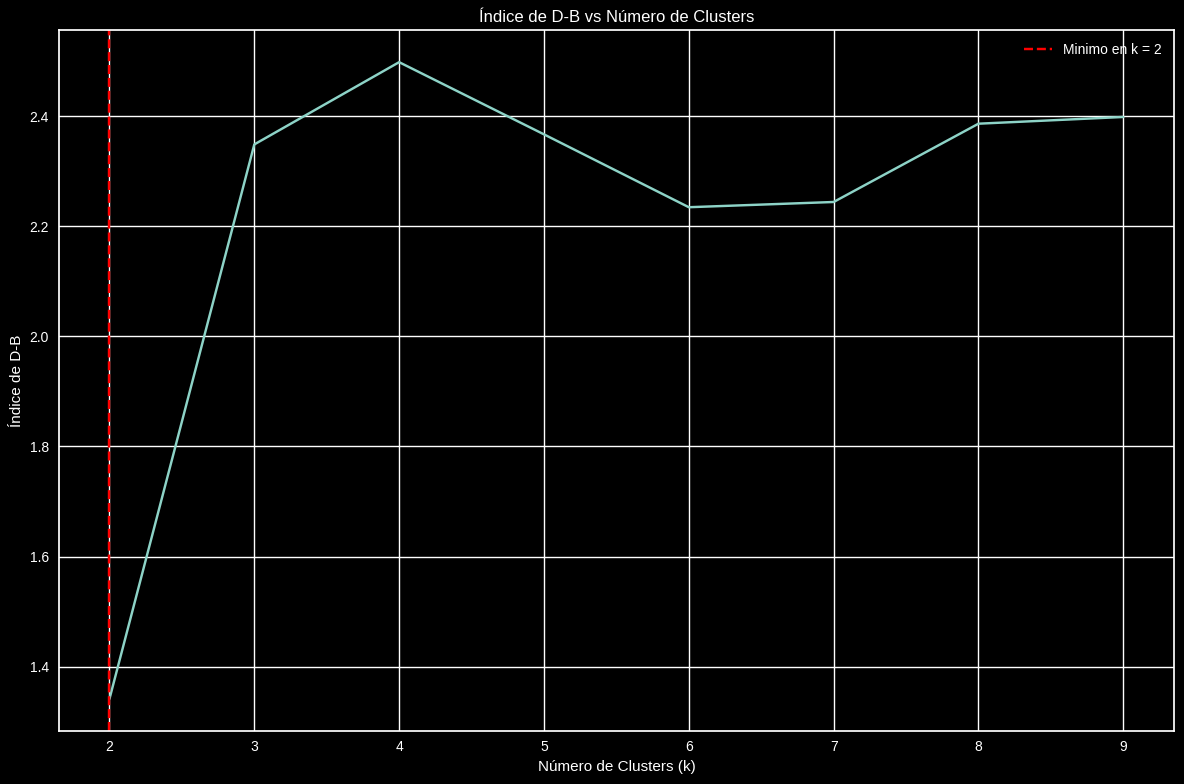

In [149]:
min_score = min(davies_bouldin_scores)
best = range_clusters[davies_bouldin_scores.index(min_score)]
plt.style.use('dark_background')
plt.figure(figsize = (12,8))
plt.plot(range_clusters, davies_bouldin_scores,linestyle='-')
plt.axvline(x = best, color = 'red', linestyle='--', label = f'Minimo en k = {best}')
plt.title('Índice de D-B vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de D-B')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

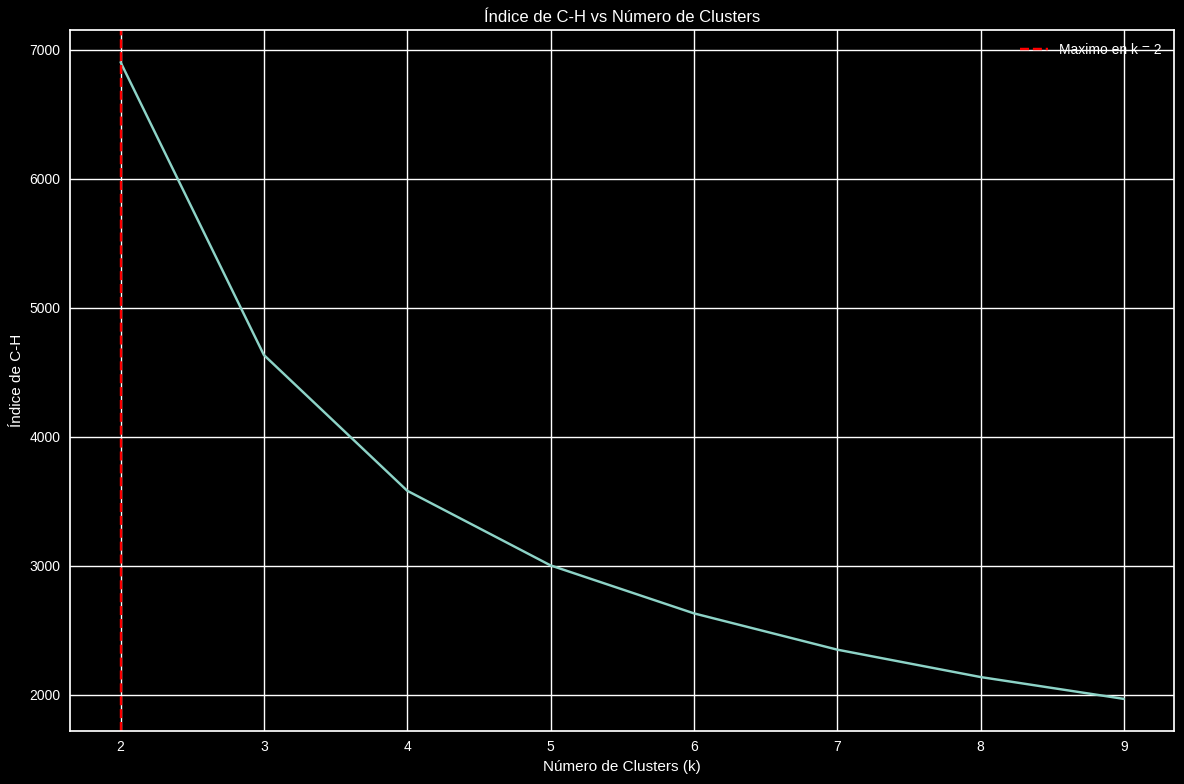

In [150]:
max_score = max(calinski_harabasz_scores)
best = range_clusters[calinski_harabasz_scores.index(max_score)]
plt.style.use('dark_background')
plt.figure(figsize = (12,8))
plt.plot(range_clusters, calinski_harabasz_scores,linestyle='-')
plt.axvline(x = best, color = 'red', linestyle='--', label = f'Maximo en k = {best}')
plt.title('Índice de C-H vs Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de C-H')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

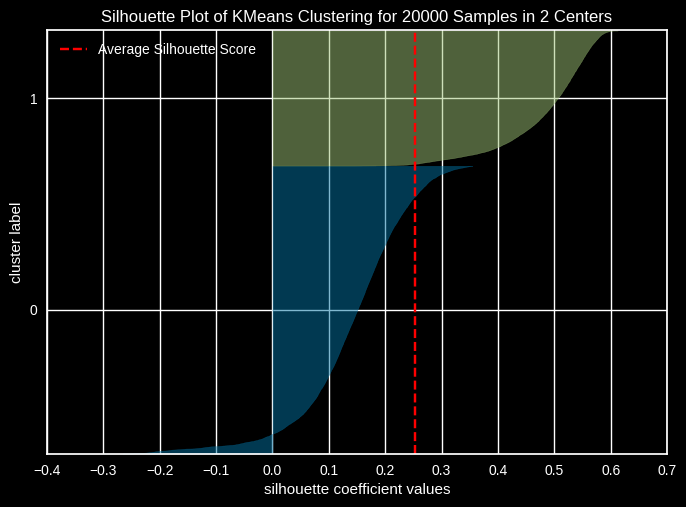

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 20000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [153]:
km = KMeans(n_clusters=2, init='k-means++', max_iter = 300,random_state=seed)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X_din)
visualizer.show()

In [154]:
X_din_sample['Grupo_km'] = km.labels_

In [157]:
X_din_sample[X_din_sample['Grupo_km'] == X_din_sample['Grupo']]

,speed,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,Grupo,Grupo_km
66933,6.843944,7.383954,7.478524,7.599012,7.886093,-0.741803,0.144450,8.972271,9.004042,1.642863,2.507528,3.194173,4.380575,9.974724,10.307837,16.602689,12.345581,0,0
342015,20.444765,20.444519,20.396515,20.353498,20.312246,-1.020927,-0.719059,10.783484,10.855546,-0.658671,9.757996,0.452677,9.790671,11.311517,12.765515,10.469650,10.396329,1,1
243923,20.528004,20.500576,20.479212,20.544447,20.537240,0.425569,0.112727,11.782265,11.790487,0.783285,6.769816,0.241597,6.819260,10.199246,11.260343,11.202294,12.788397,1,1
79422,4.166407,5.395749,6.081400,6.567088,6.622751,0.758962,2.512515,9.897829,10.239911,-2.166748,4.717509,-4.618327,6.948283,13.556518,11.040462,11.792117,12.422747,0,0
2358,18.230890,17.874756,17.503235,17.148950,16.647470,-0.381875,0.659603,11.523692,11.548869,3.601074,7.756551,0.488281,8.565643,10.663895,12.543188,11.976700,11.206788,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268043,6.626836,6.537175,6.611423,6.624919,6.619088,0.197921,0.414596,12.860055,12.868259,-2.329508,-0.839233,1.612345,2.954755,12.702071,8.466230,7.709871,13.574217,0,0
260411,21.801510,21.933010,22.167635,22.266422,22.326300,-1.830500,-0.566029,11.978723,12.130990,1.703898,2.927144,3.788418,5.081688,11.030110,11.063904,10.493589,8.472788,1,1
170939,5.321931,4.477822,4.543629,4.062129,3.702830,0.575007,2.022302,11.978590,12.161700,-1.286825,4.409790,-3.163656,5.577713,11.429026,16.435429,8.612825,11.203287,0,0
264390,14.944882,15.666540,16.019617,16.298240,16.547714,-0.725244,-1.376267,11.694278,11.797298,2.388000,-4.053752,-0.358582,4.718477,10.574987,12.764306,11.133603,11.546493,1,1


In [158]:
X_din_sample[X_din_sample['Grupo_km'] != X_din_sample['Grupo']]

,speed,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,Grupo,Grupo_km
191533,14.847477,14.494868,14.231025,13.934132,13.819774,-1.818596,-1.210468,10.907185,11.123812,-2.843221,1.269023,6.390889,7.108994,10.097194,10.912681,9.769503,11.182829,0,1
226097,12.080692,12.892360,13.036846,13.013469,12.897490,-1.391031,-0.577402,10.437921,10.546021,-0.122070,0.869751,2.655029,2.796524,10.619465,10.625639,11.597443,11.495301,0,1
250863,13.987464,13.409944,13.602618,12.952694,11.289106,-0.754972,0.486023,11.918934,11.952707,1.480103,2.642314,-0.399272,3.054823,11.346361,10.506088,10.578664,11.169064,0,1
250842,13.987464,13.409944,13.602618,12.952694,11.289106,-0.811235,0.365116,10.830570,10.867045,0.198364,-1.851400,-0.859578,2.050830,10.985081,11.868141,11.816122,11.516598,0,1
191242,13.934132,13.819774,13.721880,13.829647,14.274054,-1.501164,-0.221264,9.775525,9.892591,-2.896627,3.644307,3.646851,5.913623,10.709866,11.366440,11.247478,11.984160,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195271,12.328212,12.520050,12.721176,12.945133,13.127554,-1.009156,-0.452305,10.472637,10.530864,-0.488281,-0.506083,-0.623067,0.939549,12.207533,11.661688,11.765732,10.398971,0,1
180019,14.353992,14.353992,14.353992,13.667369,13.242854,-1.489193,-0.480037,11.425928,11.532561,2.003988,0.981649,3.682454,4.305818,11.513009,10.950543,10.493109,11.769121,0,1
191389,14.231025,13.934132,13.819774,13.721880,13.829647,-1.478819,-0.293290,11.577162,11.674914,-0.193278,-2.415975,2.461751,3.454636,9.988600,10.409622,11.475936,11.504468,0,1
131650,14.952438,14.039553,13.259221,12.458424,11.765856,-0.933539,0.980625,11.290856,11.371743,-0.419617,1.800537,0.577291,1.936821,11.522017,10.662500,11.410370,11.012907,0,1
